# Is it a Cat or a Dog
by Robert Ayub Odhiambo (http://www.a4ayub.me)

This notebook is a technical walk-through of building a binary image classifier based on a convolution nueral network step by step split into seven parts:

1. Problem Statement
2. Data Pre-processing
3. Building the model
4. Compiling the model
5. Image pre-processing and Model Fitting
6. Model improvement
7. Example prediction

**Purpose**

The purpose of this image is to document some of the technical aspects when solving a binary image classification problem using CNN

**Problem Statement**

Given a set of images, can you detect the category of an animal? Cat or Dog? The dataset is retrieved from the kaggle competition found in https://www.kaggle.com/c/dogs-vs-cats/data

**Dataset**

1. Training dataset - 25,000
    a. 12,500 Cats
    b. 12,500 Dogs
2. Testing dataset - 12,500

**Data Pre-Processing**

The images need to be organised in a certain structure for ease of training using keras.

**Building the model**

1. Convolutional Operation - This is the operation between an input image and a feature detector resulting into a feature map. And a convolution layer is created when this process is repeated to generate several feature maps
2. Max Pooling
3. Flattening
4. Full Connection

## Workbench

### Importing the files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
import pickle
import time
import sys

# Building the neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPooling2D

# Adding TensorBoard
from tensorflow.keras.callbacks import TensorBoard

# Check Tensorflow version
tf.__version__

'2.3.0'

In [2]:
# View at least 1000 rows
pd.set_option("display.max_rows", 1000)

# View at least 1000 columns
pd.set_option("display.max_columns", 1000)

# View all records in a numpy array
# This is commented out because it takes longer to visualize each of the values of the numpy array
#np.set_printoptions(threshold=sys.maxsize) 

NAME = "binary-image-classification-cnn-64x2-{}".format(int(time.time()))

tensorboard_grayscale = TensorBoard(log_dir="./logs/grayscale_{}".format(NAME))
tensorboard_rgb = TensorBoard(log_dir="./logs/rgb_{}".format(NAME))
tensorboard_rgb_improved = TensorBoard(log_dir="./logs/improved_{}".format(NAME))

### Preparing the images

In [3]:
# Define the locations to be used
DATA_DIR = "./datasets/train"
CATEGORIES = ["cats","dogs"]

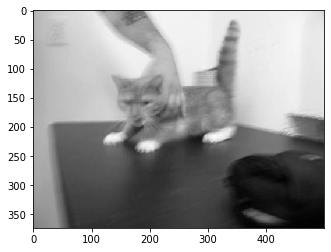

In [4]:
# Iterate through all the images
for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category) # This gets us to the path for each class
    for img in os.listdir(path):
        img_array_grayscale = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        img_array_rgb = cv2.imread(os.path.join(path,img)) # Converts to an array
        plt.imshow(img_array_grayscale,cmap="gray")  # Convert to grayscale      
        plt.show() # Show the image
        break
    break

In [5]:
# view the image data in greyscale
print(img_array_grayscale)

[[167 167 168 ... 204 203 202]
 [167 167 168 ... 205 204 202]
 [167 167 168 ... 205 204 203]
 ...
 [124 124 124 ...   2   2   2]
 [123 123 123 ...   2   2   2]
 [122 122 122 ...   1   1   1]]


In [6]:
img_array_grayscale.shape

(374, 500)

In [7]:
# view the image data in rgb
print(img_array_rgb)

[[[ 87 164 203]
  [ 87 164 203]
  [ 88 165 204]
  ...
  [122 201 240]
  [121 200 239]
  [120 199 238]]

 [[ 87 164 203]
  [ 87 164 203]
  [ 88 165 204]
  ...
  [123 202 241]
  [122 201 240]
  [120 199 238]]

 [[ 87 164 203]
  [ 87 164 203]
  [ 88 165 204]
  ...
  [123 202 241]
  [122 201 240]
  [121 200 239]]

 ...

 [[ 55 122 153]
  [ 55 122 153]
  [ 55 122 153]
  ...
  [  0   2   2]
  [  0   2   2]
  [  0   2   2]]

 [[ 54 121 152]
  [ 54 121 152]
  [ 54 121 152]
  ...
  [  0   2   2]
  [  0   2   2]
  [  0   2   2]]

 [[ 53 120 151]
  [ 53 120 151]
  [ 53 120 151]
  ...
  [  0   1   1]
  [  0   1   1]
  [  0   1   1]]]


In [8]:
img_array_rgb.shape

(374, 500, 3)

### Generate Features for Grayscale

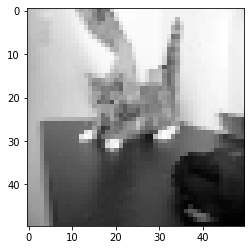

In [9]:
# Reshape the image size
IMAGE_SIZE = 50

new_img_array_grayscale = cv2.resize(img_array_grayscale,(IMAGE_SIZE,IMAGE_SIZE) )
plt.imshow(new_img_array_grayscale,cmap='gray')
plt.show()

In [11]:
# This is the funtion that will create the training data after the images are pre-processed
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category) # This gets us to the path for each class
        
        # create the class
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            
            try:
                img_array_grayscale = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)                
                #print(img_array_grayscale)
                
                # Displaying the image                 
                #plt.imshow(img_array_grayscale,cmap='gray')
                #plt.show()
                #break

                # resize the images
                new_img_array_grayscale = cv2.resize(img_array_grayscale,(IMAGE_SIZE,IMAGE_SIZE) )
                print("Shape after resize is :: {} and Shape before resize was :: {} ".format(new_img_array_grayscale.shape,img_array_grayscale.shape))
                

                # add to the training data list
                training_data.append([new_img_array_grayscale,class_num])
            except Exception as e:
                pass         
            

In [12]:
# Generate the training data 
create_training_data()

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (280, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 489) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 403) 
Shape after resize is :: (50, 50) and Shape before resize was :: (149, 150) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 431) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (471, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (177, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (320, 460) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 219) 

Shape after resize is :: (50, 50) and Shape before resize was :: (407, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 341) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (281, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (86, 85) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (365, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (273, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (448, 285) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (470, 299) 
S

Shape after resize is :: (50, 50) and Shape before resize was :: (343, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 271) 
Shape after resize is :: (50, 50) and Shape before resize was :: (377, 369) 
Shape after resize is :: (50, 50) and Shape before resize was :: (479, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (258, 174) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 258) 
Shape after resize is :: (50, 50) and Shape before resize was :: (195, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (391, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (224, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 358) 

Shape after resize is :: (50, 50) and Shape before resize was :: (435, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (380, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 383) 
Shape after resize is :: (50, 50) and Shape before resize was :: (183, 216) 
Shape after resize is :: (50, 50) and Shape before resize was :: (181, 184) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (271, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (491, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (262, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (452, 453) 

Shape after resize is :: (50, 50) and Shape before resize was :: (188, 266) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (465, 482) 
Shape after resize is :: (50, 50) and Shape before resize was :: (335, 416) 
Shape after resize is :: (50, 50) and Shape before resize was :: (496, 429) 
Shape after resize is :: (50, 50) and Shape before resize was :: (381, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 

Shape after resize is :: (50, 50) and Shape before resize was :: (335, 448) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 293) 
Shape after resize is :: (50, 50) and Shape before resize was :: (378, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (245, 329) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 340) 
Shape after resize is :: (50, 50) and Shape before resize was :: (404, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (297, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 369) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (216, 287) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 411) 
Shape after resize is :: (50, 50) and Shape before resize was :: (308, 407) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (245, 329) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 440) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (379, 468) 

Shape after resize is :: (50, 50) and Shape before resize was :: (373, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (405, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (338, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (365, 428) 
Shape after resize is :: (50, 50) and Shape before resize was :: (282, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (437, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (382, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (207, 359) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (355, 429) 
Shape after resize is :: (50, 50) and Shape before resize was :: (416, 423) 
Shape after resize is :: (50, 50) and Shape before resize was :: (454, 345) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 477) 
Shape after resize is :: (50, 50) and Shape before resize was :: (481, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (261, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 332) 
Shape after resize is :: (50, 50) and Shape before resize was :: (282, 287) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 293) 

Shape after resize is :: (50, 50) and Shape before resize was :: (473, 452) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (484, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (435, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (316, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (473, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (168, 314) 
Shape after resize is :: (50, 50) and Shape before resize was :: (254, 226) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 285) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (94, 124) 
Shape after resize is :: (50, 50) and Shape before resize was :: (348, 305) 


Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (480, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (382, 206) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 442) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (151, 133) 

Shape after resize is :: (50, 50) and Shape before resize was :: (372, 493) 
Shape after resize is :: (50, 50) and Shape before resize was :: (463, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 425) 
Shape after resize is :: (50, 50) and Shape before resize was :: (425, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (325, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 379) 
Shape after resize is :: (50, 50) and Shape before resize was :: (250, 403) 
Shape after resize is :: (50, 50) and Shape before resize was :: (475, 445) 
Shape after resize is :: (50, 50) and Shape before resize was :: (330, 340) 
Shape after resize is :: (50, 50) and Shape before resize was :: (180, 251) 

Shape after resize is :: (50, 50) and Shape before resize was :: (269, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (120, 217) 
Shape after resize is :: (50, 50) and Shape before resize was :: (140, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (409, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (397, 463) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (279, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (214, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (302, 297) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (334, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 470) 
Shape after resize is :: (50, 50) and Shape before resize was :: (320, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 408) 
Shape after resize is :: (50, 50) and Shape before resize was :: (116, 110) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (483, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (451, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (95, 200) 


Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (498, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (447, 330) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 464) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 257) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (199, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (395, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (466, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (288, 384) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (349, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (395, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (261, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (323, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (270, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (397, 272) 
Shape after resize is :: (50, 50) and Shape before resize was :: (498, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 437) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 159) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (266, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (152, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 425) 
Shape after resize is :: (50, 50) and Shape before resize was :: (152, 215) 
Shape after resize is :: (50, 50) and Shape before resize was :: (197, 199) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (284, 264) 
Shape after resize is :: (50, 50) and Shape before resize was :: (180, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (469, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (386, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (352, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (326, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (460, 456) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 425) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 402) 

Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 423) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 393) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (305, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (433, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (260, 254) 

Shape after resize is :: (50, 50) and Shape before resize was :: (346, 380) 
Shape after resize is :: (50, 50) and Shape before resize was :: (225, 175) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 378) 
Shape after resize is :: (50, 50) and Shape before resize was :: (465, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 228) 
Shape after resize is :: (50, 50) and Shape before resize was :: (136, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (402, 470) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 428) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 386) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (320, 269) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (249, 285) 
Shape after resize is :: (50, 50) and Shape before resize was :: (393, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (357, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (322, 372) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (199, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (348, 449) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (261, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (225, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 468) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (468, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (486, 467) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (500, 401) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (149, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 495) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (228, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 332) 
Shape after resize is :: (50, 50) and Shape before resize was :: (489, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (336, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (144, 218) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 437) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (320, 308) 
Shape after resize is :: (50, 50) and Shape before resize was :: (357, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (311, 410) 
Shape after resize is :: (50, 50) and Shape before resize was :: (179, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (403, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 210) 
Shape after resize is :: (50, 50) and Shape before resize was :: (372, 497) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (465, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (401, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (219, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (236, 289) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (487, 419) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (308, 353) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 312) 
Shape after resize is :: (50, 50) and Shape before resize was :: (471, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (369, 491) 
Shape after resize is :: (50, 50) and Shape before resize was :: (377, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (457, 484) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (290, 324) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 190) 
Shape after resize is :: (50, 50) and Shape before resize was :: (330, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (196, 288) 
Shape after resize is :: (50, 50) and Shape before resize was :: (480, 422) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (216, 137) 
Shape after resize is :: (50, 50) and Shape before resize was :: (455, 309) 
Shape after resize is :: (50, 50) and Shape before resize was :: (448, 335) 
Shape after resize is :: (50, 50) and Shape before resize was :: (457, 480) 

Shape after resize is :: (50, 50) and Shape before resize was :: (348, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 465) 
Shape after resize is :: (50, 50) and Shape before resize was :: (264, 290) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 449) 
Shape after resize is :: (50, 50) and Shape before resize was :: (480, 424) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 435) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (478, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (228, 448) 
Shape after resize is :: (50, 50) and Shape before resize was :: (426, 336) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 

Shape after resize is :: (50, 50) and Shape before resize was :: (499, 282) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (447, 232) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (420, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (256, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (150, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (260, 339) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (224, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 288) 

Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (420, 351) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 267) 
Shape after resize is :: (50, 50) and Shape before resize was :: (325, 496) 
Shape after resize is :: (50, 50) and Shape before resize was :: (398, 318) 
Shape after resize is :: (50, 50) and Shape before resize was :: (357, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 323) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (426, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 462) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (454, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 275) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 376) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (350, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (498, 476) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (350, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (415, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (190, 189) 
Shape after resize is :: (50, 50) and Shape before resize was :: (377, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 388) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (378, 396) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (141, 119) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (279, 369) 
Shape after resize is :: (50, 50) and Shape before resize was :: (470, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (448, 204) 
Shape after resize is :: (50, 50) and Shape before resize was :: (141, 126) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 368) 
Shape after resize is :: (50, 50) and Shape before resize was :: (416, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (339, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (442, 255) 
Shape after resize is :: (50, 50) and Shape before resize was :: (405, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (204, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 210) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (174, 115) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (319, 270) 

Shape after resize is :: (50, 50) and Shape before resize was :: (198, 149) 
Shape after resize is :: (50, 50) and Shape before resize was :: (100, 149) 
Shape after resize is :: (50, 50) and Shape before resize was :: (320, 230) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (353, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (344, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (292, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (229, 232) 
Shape after resize is :: (50, 50) and Shape before resize was :: (79, 75) 
Shape after resize is :: (50, 50) and Shape before resize was :: (89, 120) 
Shape after resize is :: (50, 50) and Shape before resize was :: (493, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (199, 242) 
Sh

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 390) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 234) 
Shape after resize is :: (50, 50) and Shape before resize was :: (435, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (254, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (345, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (307, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (353, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (325, 432) 
Shape after resize is :: (50, 50) and Shape before resize was :: (302, 263) 

Shape after resize is :: (50, 50) and Shape before resize was :: (499, 439) 
Shape after resize is :: (50, 50) and Shape before resize was :: (420, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (335, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (256, 334) 
Shape after resize is :: (50, 50) and Shape before resize was :: (357, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (262, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 380) 
Shape after resize is :: (50, 50) and Shape before resize was :: (303, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (293, 247) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (424, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (223, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (363, 336) 
Shape after resize is :: (50, 50) and Shape before resize was :: (336, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (216, 287) 
Shape after resize is :: (50, 50) and Shape before resize was :: (389, 289) 
Shape after resize is :: (50, 50) and Shape before resize was :: (379, 352) 
Shape after resize is :: (50, 50) and Shape before resize was :: (441, 439) 
Shape after resize is :: (50, 50) and Shape before resize was :: (216, 181) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (395, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (334, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (318, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (326, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 425) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 394) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 225) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (413, 361) 
Shape after resize is :: (50, 50) and Shape before resize was :: (370, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 491) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (447, 448) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (179, 181) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 288) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (338, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 426) 

Shape after resize is :: (50, 50) and Shape before resize was :: (280, 188) 
Shape after resize is :: (50, 50) and Shape before resize was :: (323, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (303, 317) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (476, 489) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (199, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 460) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (232, 350) 

Shape after resize is :: (50, 50) and Shape before resize was :: (377, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (179, 274) 
Shape after resize is :: (50, 50) and Shape before resize was :: (335, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 309) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (342, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (394, 498) 
Shape after resize is :: (50, 50) and Shape before resize was :: (150, 149) 
Shape after resize is :: (50, 50) and Shape before resize was :: (371, 400) 

Shape after resize is :: (50, 50) and Shape before resize was :: (359, 288) 
Shape after resize is :: (50, 50) and Shape before resize was :: (195, 306) 
Shape after resize is :: (50, 50) and Shape before resize was :: (395, 311) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (259, 340) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (336, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (452, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (470, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (167, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (419, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (500, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (199, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (481, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (344, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (137, 180) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (480, 459) 
Shape after resize is :: (50, 50) and Shape before resize was :: (235, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (324, 431) 
Shape after resize is :: (50, 50) and Shape before resize was :: (311, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (164, 215) 
Shape after resize is :: (50, 50) and Shape before resize was :: (235, 344) 
Shape after resize is :: (50, 50) and Shape before resize was :: (481, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (447, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (383, 384) 
Shape after resize is :: (50, 50) and Shape before resize was :: (351, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (423, 313) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (500, 337) 
Shape after resize is :: (50, 50) and Shape before resize was :: (110, 154) 
Shape after resize is :: (50, 50) and Shape before resize was :: (427, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (250, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (343, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (246, 174) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (439, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (388, 420) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (231, 249) 

Shape after resize is :: (50, 50) and Shape before resize was :: (412, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (434, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (225, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 395) 
Shape after resize is :: (50, 50) and Shape before resize was :: (491, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (176, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (220, 146) 
Shape after resize is :: (50, 50) and Shape before resize was :: (378, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (288, 283) 
Shape after resize is :: (50, 50) and Shape before resize was :: (153, 159) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 433) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 396) 
Shape after resize is :: (50, 50) and Shape before resize was :: (483, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (423, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (297, 197) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 472) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 408) 
Shape after resize is :: (50, 50) and Shape before resize was :: (394, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (257, 208) 
Shape after resize is :: (50, 50) and Shape before resize was :: (484, 398) 

Shape after resize is :: (50, 50) and Shape before resize was :: (306, 463) 
Shape after resize is :: (50, 50) and Shape before resize was :: (216, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (244, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 383) 
Shape after resize is :: (50, 50) and Shape before resize was :: (348, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (225, 276) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 314) 
Shape after resize is :: (50, 50) and Shape before resize was :: (265, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 260) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (145, 176) 

Shape after resize is :: (50, 50) and Shape before resize was :: (207, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (225, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (415, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (461, 352) 
Shape after resize is :: (50, 50) and Shape before resize was :: (389, 287) 
Shape after resize is :: (50, 50) and Shape before resize was :: (260, 339) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 436) 
Shape after resize is :: (50, 50) and Shape before resize was :: (380, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (407, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (414, 466) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (194, 145) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (348, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (131, 173) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (162, 218) 
Shape after resize is :: (50, 50) and Shape before resize was :: (143, 140) 
Shape after resize is :: (50, 50) and Shape before resize was :: (362, 396) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 412) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (147, 130) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 150) 

Shape after resize is :: (50, 50) and Shape before resize was :: (456, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (391, 439) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (442, 331) 
Shape after resize is :: (50, 50) and Shape before resize was :: (205, 179) 
Shape after resize is :: (50, 50) and Shape before resize was :: (460, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (232, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (287, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (186, 250) 
Shape after resize is :: (50, 50) and Shape before resize was :: (150, 199) 

Shape after resize is :: (50, 50) and Shape before resize was :: (224, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (397, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 232) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (317, 314) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (407, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (310, 305) 
Shape after resize is :: (50, 50) and Shape before resize was :: (431, 288) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 

Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (242, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (389, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (257, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 478) 
Shape after resize is :: (50, 50) and Shape before resize was :: (216, 242) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (272, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 494) 
Shape after resize is :: (50, 50) and Shape before resize was :: (350, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (486, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 410) 
Shape after resize is :: (50, 50) and Shape before resize was :: (423, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (240, 255) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (208, 373) 
Shape after resize is :: (50, 50) and Shape before resize was :: (276, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (434, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 333) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 324) 
Shape after resize is :: (50, 50) and Shape before resize was :: (217, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (266, 354) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (310, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (344, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (448, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (169, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (164, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 428) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (432, 419) 

Shape after resize is :: (50, 50) and Shape before resize was :: (255, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 485) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (481, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 444) 
Shape after resize is :: (50, 50) and Shape before resize was :: (301, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (166, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (475, 489) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (346, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (480, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (427, 402) 
Shape after resize is :: (50, 50) and Shape before resize was :: (308, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (290, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (339, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (116, 204) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 410) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (289, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (302, 251) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 449) 
Shape after resize is :: (50, 50) and Shape before resize was :: (371, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 461) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (262, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (208, 294) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (308, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (489, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (379, 417) 

Shape after resize is :: (50, 50) and Shape before resize was :: (296, 274) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (467, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (224, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 456) 
Shape after resize is :: (50, 50) and Shape before resize was :: (426, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (260, 214) 
Shape after resize is :: (50, 50) and Shape before resize was :: (182, 180) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (262, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (305, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (214, 258) 

Shape after resize is :: (50, 50) and Shape before resize was :: (309, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (474, 429) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (228, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (490, 430) 
Shape after resize is :: (50, 50) and Shape before resize was :: (262, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (93, 139) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 265) 
Shape after resize is :: (50, 50) and Shape before resize was :: (398, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 


Shape after resize is :: (50, 50) and Shape before resize was :: (129, 180) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 286) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 286) 
Shape after resize is :: (50, 50) and Shape before resize was :: (409, 444) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 247) 
Shape after resize is :: (50, 50) and Shape before resize was :: (179, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (315, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 391) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (366, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (219, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (297, 410) 
Shape after resize is :: (50, 50) and Shape before resize was :: (220, 222) 
Shape after resize is :: (50, 50) and Shape before resize was :: (463, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (345, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (431, 317) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (425, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 486) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 306) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 366) 
Shape after resize is :: (50, 50) and Shape before resize was :: (143, 376) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (447, 338) 
Shape after resize is :: (50, 50) and Shape before resize was :: (223, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (298, 345) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (355, 492) 
Shape after resize is :: (50, 50) and Shape before resize was :: (340, 482) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (447, 344) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (261, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 460) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (342, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (361, 463) 
Shape after resize is :: (50, 50) and Shape before resize was :: (368, 278) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (292, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (216, 215) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (384, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (289, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (447, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 464) 
Shape after resize is :: (50, 50) and Shape before resize was :: (289, 387) 
Shape after resize is :: (50, 50) and Shape before resize was :: (348, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 476) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 491) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 437) 
Shape after resize is :: (50, 50) and Shape before resize was :: (343, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (377, 449) 
Shape after resize is :: (50, 50) and Shape before resize was :: (296, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 448) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (459, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (322, 423) 
Shape after resize is :: (50, 50) and Shape before resize was :: (45, 59) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (99, 150) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (133, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (261, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (36, 59) 
Shape after resize is :: (50, 50) and Shape before resize was :: (195, 286) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shap

Shape after resize is :: (50, 50) and Shape before resize was :: (251, 288) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 361) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 412) 
Shape after resize is :: (50, 50) and Shape before resize was :: (382, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (354, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 394) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 474) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 371) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (371, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (149, 240) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 489) 
Shape after resize is :: (50, 50) and Shape before resize was :: (370, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (432, 266) 
Shape after resize is :: (50, 50) and Shape before resize was :: (413, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (421, 255) 
Shape after resize is :: (50, 50) and Shape before resize was :: (445, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 247) 
Shape after resize is :: (50, 50) and Shape before resize was :: (288, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (252, 319) 

Shape after resize is :: (50, 50) and Shape before resize was :: (103, 240) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (313, 336) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 358) 
Shape after resize is :: (50, 50) and Shape before resize was :: (72, 95) 
Shape after resize is :: (50, 50) and Shape before resize was :: (410, 336) 
Shape after resize is :: (50, 50) and Shape before resize was :: (259, 250) 
Shape after resize is :: (50, 50) and Shape before resize was :: (461, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (288, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (262, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (72, 95) 
Shape after resize is :: (50, 50) and Shape before resize was :: (435, 500) 
Sha

Shape after resize is :: (50, 50) and Shape before resize was :: (443, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 398) 
Shape after resize is :: (50, 50) and Shape before resize was :: (187, 192) 
Shape after resize is :: (50, 50) and Shape before resize was :: (324, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (490, 498) 
Shape after resize is :: (50, 50) and Shape before resize was :: (192, 255) 
Shape after resize is :: (50, 50) and Shape before resize was :: (179, 190) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 489) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (428, 373) 

Shape after resize is :: (50, 50) and Shape before resize was :: (291, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (461, 466) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (347, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (216, 287) 
Shape after resize is :: (50, 50) and Shape before resize was :: (236, 168) 

Shape after resize is :: (50, 50) and Shape before resize was :: (349, 335) 
Shape after resize is :: (50, 50) and Shape before resize was :: (210, 279) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (115, 112) 
Shape after resize is :: (50, 50) and Shape before resize was :: (479, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 312) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 341) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (235, 349) 

Shape after resize is :: (50, 50) and Shape before resize was :: (475, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (255, 384) 
Shape after resize is :: (50, 50) and Shape before resize was :: (394, 386) 
Shape after resize is :: (50, 50) and Shape before resize was :: (379, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (370, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 278) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (380, 418) 
Shape after resize is :: (50, 50) and Shape before resize was :: (417, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (325, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (195, 211) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (304, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 380) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (371, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (489, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (261, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (315, 467) 
Shape after resize is :: (50, 50) and Shape before resize was :: (391, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (334, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (477, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 358) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 226) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 254) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 

Shape after resize is :: (50, 50) and Shape before resize was :: (335, 448) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 276) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 432) 
Shape after resize is :: (50, 50) and Shape before resize was :: (261, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (436, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (467, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (180, 225) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (267, 360) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (286, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (476, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (224, 301) 
Shape after resize is :: (50, 50) and Shape before resize was :: (326, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (294, 244) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (192, 124) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (155, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 334) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 399) 

Shape after resize is :: (50, 50) and Shape before resize was :: (500, 455) 
Shape after resize is :: (50, 50) and Shape before resize was :: (378, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (496, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (313, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (350, 342) 
Shape after resize is :: (50, 50) and Shape before resize was :: (174, 234) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (483, 416) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 187) 
Shape after resize is :: (50, 50) and Shape before resize was :: (425, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (424, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (227, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (413, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (271, 234) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 446) 
Shape after resize is :: (50, 50) and Shape before resize was :: (222, 221) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (435, 414) 
Shape after resize is :: (50, 50) and Shape before resize was :: (335, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 371) 
Shape after resize is :: (50, 50) and Shape before resize was :: (384, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (252, 186) 
Shape after resize is :: (50, 50) and Shape before resize was :: (151, 220) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (225, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (417, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 346) 
Shape after resize is :: (50, 50) and Shape before resize was :: (261, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (320, 285) 
Shape after resize is :: (50, 50) and Shape before resize was :: (149, 150) 
Shape after resize is :: (50, 50) and Shape before resize was :: (256, 281) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (175, 348) 
Shape after resize is :: (50, 50) and Shape before resize was :: (297, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (457, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (239, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (414, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 453) 
Shape after resize is :: (50, 50) and Shape before resize was :: (212, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (253, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (397, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (293, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (176, 191) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (122, 198) 
Shape after resize is :: (50, 50) and Shape before resize was :: (335, 277) 

Shape after resize is :: (50, 50) and Shape before resize was :: (186, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (346, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (147, 237) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 492) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 469) 
Shape after resize is :: (50, 50) and Shape before resize was :: (197, 278) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 289) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (499, 419) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (406, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 380) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 288) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (356, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (356, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (276, 186) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 257) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (287, 240) 
Shape after resize is :: (50, 50) and Shape before resize was :: (229, 340) 
Shape after resize is :: (50, 50) and Shape before resize was :: (199, 151) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 466) 
Shape after resize is :: (50, 50) and Shape before resize was :: (287, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (283, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (479, 260) 
Shape after resize is :: (50, 50) and Shape before resize was :: (334, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (449, 315) 

Shape after resize is :: (50, 50) and Shape before resize was :: (368, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (345, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (173, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 376) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (426, 498) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 484) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (500, 386) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 364) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (425, 498) 
Shape after resize is :: (50, 50) and Shape before resize was :: (323, 344) 
Shape after resize is :: (50, 50) and Shape before resize was :: (490, 478) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (494, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (346, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (149, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (218, 274) 

Shape after resize is :: (50, 50) and Shape before resize was :: (476, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 290) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (336, 450) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (371, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (324, 284) 
Shape after resize is :: (50, 50) and Shape before resize was :: (377, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (447, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (329, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (248, 250) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (346, 234) 
Shape after resize is :: (50, 50) and Shape before resize was :: (454, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (410, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (208, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (447, 259) 
Shape after resize is :: (50, 50) and Shape before resize was :: (273, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (314, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (461, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (338, 449) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 431) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 438) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (411, 469) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (119, 159) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (450, 417) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (395, 340) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (343, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (499, 481) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 341) 
Shape after resize is :: (50, 50) and Shape before resize was :: (391, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (365, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (416, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (404, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 498) 
Shape after resize is :: (50, 50) and Shape before resize was :: (194, 201) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (360, 335) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (448, 314) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 467) 
Shape after resize is :: (50, 50) and Shape before resize was :: (433, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 362) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (279, 244) 
Shape after resize is :: (50, 50) and Shape before resize was :: (443, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 432) 
Shape after resize is :: (50, 50) and Shape before resize was :: (230, 165) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (147, 254) 
Shape after resize is :: (50, 50) and Shape before resize was :: (187, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (283, 291) 
Shape after resize is :: (50, 50) and Shape before resize was :: (327, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (283, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (432, 431) 
Shape after resize is :: (50, 50) and Shape before resize was :: (225, 276) 
Shape after resize is :: (50, 50) and Shape before resize was :: (224, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (301, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 472) 
Shape after resize is :: (50, 50) and Shape before resize was :: (309, 410) 
Shape after resize is :: (50, 50) and Shape before resize was :: (102, 99) 
Shape after resize is :: (50, 50) and Shape before resize was :: (346, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (409, 306) 


Shape after resize is :: (50, 50) and Shape before resize was :: (500, 489) 
Shape after resize is :: (50, 50) and Shape before resize was :: (433, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (496, 311) 
Shape after resize is :: (50, 50) and Shape before resize was :: (335, 448) 
Shape after resize is :: (50, 50) and Shape before resize was :: (432, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (307, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 293) 
Shape after resize is :: (50, 50) and Shape before resize was :: (367, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 333) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (223, 300) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 491) 
Shape after resize is :: (50, 50) and Shape before resize was :: (312, 448) 
Shape after resize is :: (50, 50) and Shape before resize was :: (492, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (347, 398) 
Shape after resize is :: (50, 50) and Shape before resize was :: (324, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (249, 250) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (369, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (319, 303) 
Shape after resize is :: (50, 50) and Shape before resize was :: (340, 302) 
Shape after resize is :: (50, 50) and Shape before resize was :: (262, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (266, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 442) 
Shape after resize is :: (50, 50) and Shape before resize was :: (387, 462) 
Shape after resize is :: (50, 50) and Shape before resize was :: (457, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (455, 416) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 308) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (458, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (120, 88) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (433, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (395, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (365, 336) 
Shape after resize is :: (50, 50) and Shape before resize was :: (249, 237) 
Shape after resize is :: (50, 50) and Shape before resize was :: (467, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (113, 140) 
Shape after resize is :: (50, 50) and Shape before resize was :: (463, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 


Shape after resize is :: (50, 50) and Shape before resize was :: (500, 417) 
Shape after resize is :: (50, 50) and Shape before resize was :: (388, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (356, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (426, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (455, 281) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 433) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 352) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 282) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (457, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (433, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (426, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (330, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (256, 250) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (282, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (38, 145) 


Shape after resize is :: (50, 50) and Shape before resize was :: (262, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (271, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (249, 250) 
Shape after resize is :: (50, 50) and Shape before resize was :: (382, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (337, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (320, 239) 
Shape after resize is :: (50, 50) and Shape before resize was :: (350, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (330, 439) 
Shape after resize is :: (50, 50) and Shape before resize was :: (199, 212) 
Shape after resize is :: (50, 50) and Shape before resize was :: (355, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (345, 379) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (349, 293) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (197, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 320) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (281, 220) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (238, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (319, 224) 
Shape after resize is :: (50, 50) and Shape before resize was :: (377, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (409, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (218, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (229, 139) 
Shape after resize is :: (50, 50) and Shape before resize was :: (258, 174) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 333) 
Shape after resize is :: (50, 50) and Shape before resize was :: (188, 249) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 424) 
Shape after resize is :: (50, 50) and Shape before resize was :: (487, 325) 
Shape after resize is :: (50, 50) and Shape before resize was :: (285, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 462) 
Shape after resize is :: (50, 50) and Shape before resize was :: (187, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 417) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 365) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (463, 386) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 438) 

Shape after resize is :: (50, 50) and Shape before resize was :: (187, 250) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (215, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (261, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (223, 216) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (464, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (171, 449) 

Shape after resize is :: (50, 50) and Shape before resize was :: (119, 149) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (120, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (425, 354) 
Shape after resize is :: (50, 50) and Shape before resize was :: (284, 278) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 446) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (241, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (376, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (150, 180) 

Shape after resize is :: (50, 50) and Shape before resize was :: (331, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (338, 449) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 333) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 417) 
Shape after resize is :: (50, 50) and Shape before resize was :: (320, 273) 
Shape after resize is :: (50, 50) and Shape before resize was :: (232, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (440, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (429, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (301, 300) 

Shape after resize is :: (50, 50) and Shape before resize was :: (298, 431) 
Shape after resize is :: (50, 50) and Shape before resize was :: (324, 230) 
Shape after resize is :: (50, 50) and Shape before resize was :: (247, 330) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (204, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (420, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (147, 155) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 373) 
Shape after resize is :: (50, 50) and Shape before resize was :: (445, 450) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 412) 

Shape after resize is :: (50, 50) and Shape before resize was :: (299, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (285, 434) 
Shape after resize is :: (50, 50) and Shape before resize was :: (241, 323) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (224, 279) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (446, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 456) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 479) 

Shape after resize is :: (50, 50) and Shape before resize was :: (298, 194) 
Shape after resize is :: (50, 50) and Shape before resize was :: (445, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 421) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (286, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (409, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 409) 
Shape after resize is :: (50, 50) and Shape before resize was :: (149, 231) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (225, 299) 

Shape after resize is :: (50, 50) and Shape before resize was :: (499, 367) 
Shape after resize is :: (50, 50) and Shape before resize was :: (330, 329) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 455) 
Shape after resize is :: (50, 50) and Shape before resize was :: (88, 132) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (261, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (262, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (459, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (99, 100) 
Shape after resize is :: (50, 50) and Shape before resize was :: (232, 240) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 314) 
S

Shape after resize is :: (50, 50) and Shape before resize was :: (459, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 250) 
Shape after resize is :: (50, 50) and Shape before resize was :: (288, 233) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 409) 
Shape after resize is :: (50, 50) and Shape before resize was :: (171, 260) 
Shape after resize is :: (50, 50) and Shape before resize was :: (393, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (433, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (480, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (489, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (396, 369) 
Shape after resize is :: (50, 50) and Shape before resize was :: (348, 432) 

Shape after resize is :: (50, 50) and Shape before resize was :: (499, 333) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (401, 476) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 466) 
Shape after resize is :: (50, 50) and Shape before resize was :: (319, 240) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (317, 307) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 349) 

Shape after resize is :: (50, 50) and Shape before resize was :: (500, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 333) 
Shape after resize is :: (50, 50) and Shape before resize was :: (349, 421) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (335, 448) 
Shape after resize is :: (50, 50) and Shape before resize was :: (154, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (439, 290) 
Shape after resize is :: (50, 50) and Shape before resize was :: (297, 347) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (320, 239) 

Shape after resize is :: (50, 50) and Shape before resize was :: (245, 326) 
Shape after resize is :: (50, 50) and Shape before resize was :: (345, 250) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 352) 
Shape after resize is :: (50, 50) and Shape before resize was :: (353, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 336) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (346, 259) 
Shape after resize is :: (50, 50) and Shape before resize was :: (396, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 342) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 341) 

Shape after resize is :: (50, 50) and Shape before resize was :: (363, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (319, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (149, 150) 
Shape after resize is :: (50, 50) and Shape before resize was :: (469, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 426) 
Shape after resize is :: (50, 50) and Shape before resize was :: (345, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (397, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (215, 251) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (234, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 367) 

Shape after resize is :: (50, 50) and Shape before resize was :: (307, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (231, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (329, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (430, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (231, 206) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (237, 264) 
Shape after resize is :: (50, 50) and Shape before resize was :: (407, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (288, 284) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 370) 
Shape after resize is :: (50, 50) and Shape before resize was :: (280, 308) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (376, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (289, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (482, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (366, 429) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (335, 448) 
Shape after resize is :: (50, 50) and Shape before resize was :: (295, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (322, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (365, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 315) 
Shape after resize is :: (50, 50) and Shape before resize was :: (123, 93) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 


Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (288, 275) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (192, 255) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 426) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 363) 
Shape after resize is :: (50, 50) and Shape before resize was :: (484, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 276) 

Shape after resize is :: (50, 50) and Shape before resize was :: (408, 338) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (376, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (130, 88) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (232, 263) 
Shape after resize is :: (50, 50) and Shape before resize was :: (388, 204) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (297, 395) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 293) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 315) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 396) 


Shape after resize is :: (50, 50) and Shape before resize was :: (368, 198) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 284) 
Shape after resize is :: (50, 50) and Shape before resize was :: (385, 280) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (255, 234) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 430) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 267) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (192, 190) 

Shape after resize is :: (50, 50) and Shape before resize was :: (499, 298) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 304) 
Shape after resize is :: (50, 50) and Shape before resize was :: (372, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (403, 495) 
Shape after resize is :: (50, 50) and Shape before resize was :: (289, 435) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 318) 
Shape after resize is :: (50, 50) and Shape before resize was :: (428, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (242, 322) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (319, 240) 
Shape after resize is :: (50, 50) and Shape before resize was :: (423, 477) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 180) 
Shape after resize is :: (50, 50) and Shape before resize was :: (345, 284) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (457, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (341, 368) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (273, 233) 
Shape after resize is :: (50, 50) and Shape before resize was :: (358, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (281, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (396, 397) 

Shape after resize is :: (50, 50) and Shape before resize was :: (300, 224) 
Shape after resize is :: (50, 50) and Shape before resize was :: (490, 256) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (212, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (405, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (232, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (264, 351) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 406) 
Shape after resize is :: (50, 50) and Shape before resize was :: (470, 385) 
Shape after resize is :: (50, 50) and Shape before resize was :: (327, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (316, 208) 
Shape after resize is :: (50, 50) and Shape before resize was :: (423, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 470) 
Shape after resize is :: (50, 50) and Shape before resize was :: (301, 373) 
Shape after resize is :: (50, 50) and Shape before resize was :: (362, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (225, 210) 
Shape after resize is :: (50, 50) and Shape before resize was :: (372, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (354, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (263, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (265, 235) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 498) 
Shape after resize is :: (50, 50) and Shape before resize was :: (47, 60) 
S

Shape after resize is :: (50, 50) and Shape before resize was :: (255, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 314) 
Shape after resize is :: (50, 50) and Shape before resize was :: (421, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (433, 391) 
Shape after resize is :: (50, 50) and Shape before resize was :: (387, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (254, 257) 
Shape after resize is :: (50, 50) and Shape before resize was :: (150, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (393, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 388) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 408) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (222, 271) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (432, 321) 
Shape after resize is :: (50, 50) and Shape before resize was :: (310, 242) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 469) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 421) 
Shape after resize is :: (50, 50) and Shape before resize was :: (319, 426) 

Shape after resize is :: (50, 50) and Shape before resize was :: (370, 394) 
Shape after resize is :: (50, 50) and Shape before resize was :: (310, 362) 
Shape after resize is :: (50, 50) and Shape before resize was :: (479, 336) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (101, 149) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (206, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (146, 180) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 344) 
Shape after resize is :: (50, 50) and Shape before resize was :: (450, 363) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (413, 420) 
Shape after resize is :: (50, 50) and Shape before resize was :: (134, 156) 
Shape after resize is :: (50, 50) and Shape before resize was :: (330, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 192) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 259) 
Shape after resize is :: (50, 50) and Shape before resize was :: (325, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (295, 196) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 490) 
Shape after resize is :: (50, 50) and Shape before resize was :: (353, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (493, 395) 

Shape after resize is :: (50, 50) and Shape before resize was :: (500, 396) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 307) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (90, 119) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 469) 
Shape after resize is :: (50, 50) and Shape before resize was :: (320, 213) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 338) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 430) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 406) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 413) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (77, 99) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 439) 
Sh

Shape after resize is :: (50, 50) and Shape before resize was :: (499, 332) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 307) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (438, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (436, 343) 
Shape after resize is :: (50, 50) and Shape before resize was :: (469, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (349, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 305) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 226) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 326) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (275, 235) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (382, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (199, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (320, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (164, 218) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 418) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 333) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 482) 
Shape after resize is :: (50, 50) and Shape before resize was :: (162, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (304, 260) 

Shape after resize is :: (50, 50) and Shape before resize was :: (499, 308) 
Shape after resize is :: (50, 50) and Shape before resize was :: (348, 450) 
Shape after resize is :: (50, 50) and Shape before resize was :: (403, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (382, 411) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 362) 
Shape after resize is :: (50, 50) and Shape before resize was :: (367, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 463) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 467) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 459) 
Shape after resize is :: (50, 50) and Shape before resize was :: (480, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (324, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 390) 

Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 226) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 373) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (361, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (491, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (326, 394) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (409, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (281, 407) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 420) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 394) 
Shape after resize is :: (50, 50) and Shape before resize was :: (226, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (324, 311) 
Shape after resize is :: (50, 50) and Shape before resize was :: (258, 149) 
Shape after resize is :: (50, 50) and Shape before resize was :: (324, 431) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (287, 231) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 206) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (433, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (140, 259) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 318) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 451) 
Shape after resize is :: (50, 50) and Shape before resize was :: (302, 392) 
Shape after resize is :: (50, 50) and Shape before resize was :: (488, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (417, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (467, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (252, 349) 

Shape after resize is :: (50, 50) and Shape before resize was :: (379, 260) 
Shape after resize is :: (50, 50) and Shape before resize was :: (335, 272) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 459) 
Shape after resize is :: (50, 50) and Shape before resize was :: (354, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 412) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (364, 250) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 398) 
Shape after resize is :: (50, 50) and Shape before resize was :: (385, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 332) 

Shape after resize is :: (50, 50) and Shape before resize was :: (242, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (352, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (348, 215) 
Shape after resize is :: (50, 50) and Shape before resize was :: (367, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 224) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 487) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (401, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 429) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 344) 
Shape after resize is :: (50, 50) and Shape before resize was :: (346, 303) 

Shape after resize is :: (50, 50) and Shape before resize was :: (199, 180) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 326) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 141) 
Shape after resize is :: (50, 50) and Shape before resize was :: (225, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 188) 
Shape after resize is :: (50, 50) and Shape before resize was :: (321, 293) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 196) 
Shape after resize is :: (50, 50) and Shape before resize was :: (352, 293) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (453, 415) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (377, 304) 
Shape after resize is :: (50, 50) and Shape before resize was :: (189, 215) 
Shape after resize is :: (50, 50) and Shape before resize was :: (199, 187) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (389, 273) 
Shape after resize is :: (50, 50) and Shape before resize was :: (339, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (228, 215) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 376) 
Shape after resize is :: (50, 50) and Shape before resize was :: (474, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (480, 384) 
Shape after resize is :: (50, 50) and Shape before resize was :: (393, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (304, 314) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 318) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 277) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 415) 
Shape after resize is :: (50, 50) and Shape before resize was :: (199, 155) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (460, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (244, 252) 

Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (473, 357) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (350, 395) 
Shape after resize is :: (50, 50) and Shape before resize was :: (358, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (479, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (388, 206) 
Shape after resize is :: (50, 50) and Shape before resize was :: (371, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 354) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 

Shape after resize is :: (50, 50) and Shape before resize was :: (363, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (346, 259) 
Shape after resize is :: (50, 50) and Shape before resize was :: (428, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (288, 431) 
Shape after resize is :: (50, 50) and Shape before resize was :: (423, 290) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (403, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (328, 222) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (99, 100) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 484) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 364) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 448) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (379, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (398, 389) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (258, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 274) 


Shape after resize is :: (50, 50) and Shape before resize was :: (402, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (475, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (296, 288) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (212, 255) 
Shape after resize is :: (50, 50) and Shape before resize was :: (349, 384) 
Shape after resize is :: (50, 50) and Shape before resize was :: (150, 143) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 405) 
Shape after resize is :: (50, 50) and Shape before resize was :: (474, 337) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 380) 

Shape after resize is :: (50, 50) and Shape before resize was :: (273, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 348) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (234, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (325, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 301) 
Shape after resize is :: (50, 50) and Shape before resize was :: (228, 226) 
Shape after resize is :: (50, 50) and Shape before resize was :: (485, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (483, 271) 

Shape after resize is :: (50, 50) and Shape before resize was :: (373, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (187, 206) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (473, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 128) 
Shape after resize is :: (50, 50) and Shape before resize was :: (292, 418) 
Shape after resize is :: (50, 50) and Shape before resize was :: (397, 402) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 491) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (499, 276) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (245, 305) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 119) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (229, 266) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (316, 416) 
Shape after resize is :: (50, 50) and Shape before resize was :: (334, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (312, 363) 

Shape after resize is :: (50, 50) and Shape before resize was :: (499, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 356) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (256, 340) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 332) 
Shape after resize is :: (50, 50) and Shape before resize was :: (207, 259) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 410) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (149, 118) 
Shape after resize is :: (50, 50) and Shape before resize was :: (298, 266) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 353) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 247) 

Shape after resize is :: (50, 50) and Shape before resize was :: (242, 281) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (419, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (322, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (474, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 329) 
Shape after resize is :: (50, 50) and Shape before resize was :: (288, 427) 
Shape after resize is :: (50, 50) and Shape before resize was :: (128, 139) 
Shape after resize is :: (50, 50) and Shape before resize was :: (301, 383) 
Shape after resize is :: (50, 50) and Shape before resize was :: (287, 384) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (299, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 492) 
Shape after resize is :: (50, 50) and Shape before resize was :: (339, 475) 
Shape after resize is :: (50, 50) and Shape before resize was :: (208, 315) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 298) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (383, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 258) 
Shape after resize is :: (50, 50) and Shape before resize was :: (180, 255) 
Shape after resize is :: (50, 50) and Shape before resize was :: (90, 119) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (288, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (271, 299) 


Shape after resize is :: (50, 50) and Shape before resize was :: (391, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (306, 325) 
Shape after resize is :: (50, 50) and Shape before resize was :: (225, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (405, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 415) 
Shape after resize is :: (50, 50) and Shape before resize was :: (261, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (350, 474) 
Shape after resize is :: (50, 50) and Shape before resize was :: (245, 227) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (463, 460) 
Shape after resize is :: (50, 50) and Shape before resize was :: (199, 178) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 496) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 287) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (296, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (315, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 329) 
Shape after resize is :: (50, 50) and Shape before resize was :: (439, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 490) 
Shape after resize is :: (50, 50) and Shape before resize was :: (449, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (431, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (480, 445) 

Shape after resize is :: (50, 50) and Shape before resize was :: (448, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 333) 
Shape after resize is :: (50, 50) and Shape before resize was :: (472, 297) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 398) 
Shape after resize is :: (50, 50) and Shape before resize was :: (428, 379) 
Shape after resize is :: (50, 50) and Shape before resize was :: (363, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 486) 
Shape after resize is :: (50, 50) and Shape before resize was :: (370, 423) 
Shape after resize is :: (50, 50) and Shape before resize was :: (264, 350) 

Shape after resize is :: (50, 50) and Shape before resize was :: (167, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (460, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 452) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (380, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (301, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 369) 
Shape after resize is :: (50, 50) and Shape before resize was :: (169, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (288, 384) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (396, 391) 

Shape after resize is :: (50, 50) and Shape before resize was :: (497, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (469, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (195, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (481, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (384, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (150, 184) 
Shape after resize is :: (50, 50) and Shape before resize was :: (416, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 275) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 191) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 449) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 256) 
Shape after resize is :: (50, 50) and Shape before resize was :: (380, 317) 

Shape after resize is :: (50, 50) and Shape before resize was :: (380, 443) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 344) 
Shape after resize is :: (50, 50) and Shape before resize was :: (454, 438) 
Shape after resize is :: (50, 50) and Shape before resize was :: (345, 259) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 465) 
Shape after resize is :: (50, 50) and Shape before resize was :: (416, 315) 
Shape after resize is :: (50, 50) and Shape before resize was :: (371, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (434, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 273) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 463) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 420) 
Shape after resize is :: (50, 50) and Shape before resize was :: (330, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (436, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (276, 250) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (445, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (427, 426) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 253) 
Shape after resize is :: (50, 50) and Shape before resize was :: (369, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 224) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (464, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (372, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (465, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (409, 430) 
Shape after resize is :: (50, 50) and Shape before resize was :: (356, 324) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 356) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 301) 
Shape after resize is :: (50, 50) and Shape before resize was :: (218, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 304) 
Shape after resize is :: (50, 50) and Shape before resize was :: (466, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 317) 
Shape after resize is :: (50, 50) and Shape before resize was :: (448, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (389, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (287, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (197, 149) 
Shape after resize is :: (50, 50) and Shape before resize was :: (320, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 421) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 428) 
Shape after resize is :: (50, 50) and Shape before resize was :: (447, 297) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 438) 
Shape after resize is :: (50, 50) and Shape before resize was :: (403, 454) 
Shape after resize is :: (50, 50) and Shape before resize was :: (458, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 236) 
Shape after resize is :: (50, 50) and Shape before resize was :: (455, 342) 

Shape after resize is :: (50, 50) and Shape before resize was :: (445, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 175) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 376) 
Shape after resize is :: (50, 50) and Shape before resize was :: (394, 324) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 430) 
Shape after resize is :: (50, 50) and Shape before resize was :: (473, 465) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (361, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (336, 360) 

Shape after resize is :: (50, 50) and Shape before resize was :: (500, 344) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 205) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (307, 314) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 434) 
Shape after resize is :: (50, 50) and Shape before resize was :: (175, 191) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (122, 143) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 399) 

Shape after resize is :: (50, 50) and Shape before resize was :: (315, 409) 
Shape after resize is :: (50, 50) and Shape before resize was :: (420, 403) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (454, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 313) 
Shape after resize is :: (50, 50) and Shape before resize was :: (181, 120) 
Shape after resize is :: (50, 50) and Shape before resize was :: (426, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (249, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (361, 280) 
Shape after resize is :: (50, 50) and Shape before resize was :: (447, 282) 
Shape after resize is :: (50, 50) and Shape before resize was :: (104, 139) 
Shape after resize is :: (50, 50) and Shape before resize was :: (265, 400) 

Shape after resize is :: (50, 50) and Shape before resize was :: (449, 275) 
Shape after resize is :: (50, 50) and Shape before resize was :: (266, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (339, 395) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 496) 
Shape after resize is :: (50, 50) and Shape before resize was :: (122, 117) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 384) 
Shape after resize is :: (50, 50) and Shape before resize was :: (172, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (441, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 424) 
Shape after resize is :: (50, 50) and Shape before resize was :: (167, 232) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (260, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (407, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (279, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (220, 220) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (329, 424) 
Shape after resize is :: (50, 50) and Shape before resize was :: (390, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (225, 241) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 407) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (416, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (225, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (132, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (357, 442) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 401) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 337) 
Shape after resize is :: (50, 50) and Shape before resize was :: (424, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (361, 350) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (482, 434) 
Shape after resize is :: (50, 50) and Shape before resize was :: (301, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (497, 449) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (443, 356) 
Shape after resize is :: (50, 50) and Shape before resize was :: (353, 426) 
Shape after resize is :: (50, 50) and Shape before resize was :: (365, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (231, 319) 

Shape after resize is :: (50, 50) and Shape before resize was :: (412, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (462, 463) 
Shape after resize is :: (50, 50) and Shape before resize was :: (261, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (323, 483) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 273) 
Shape after resize is :: (50, 50) and Shape before resize was :: (392, 225) 
Shape after resize is :: (50, 50) and Shape before resize was :: (471, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (344, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (221, 155) 
Shape after resize is :: (50, 50) and Shape before resize was :: (305, 329) 
Shape after resize is :: (50, 50) and Shape before resize was :: (428, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (488, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 468) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 295) 
Shape after resize is :: (50, 50) and Shape before resize was :: (420, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (465, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (329, 448) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 333) 
Shape after resize is :: (50, 50) and Shape before resize was :: (285, 379) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 431) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 414) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (289, 368) 
Shape after resize is :: (50, 50) and Shape before resize was :: (368, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (227, 257) 
Shape after resize is :: (50, 50) and Shape before resize was :: (79, 120) 
Shape after resize is :: (50, 50) and Shape before resize was :: (398, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (324, 238) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (208, 199) 


Shape after resize is :: (50, 50) and Shape before resize was :: (219, 404) 
Shape after resize is :: (50, 50) and Shape before resize was :: (263, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (413, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (478, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 335) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (264, 266) 
Shape after resize is :: (50, 50) and Shape before resize was :: (262, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (192, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 279) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (232, 267) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 406) 
Shape after resize is :: (50, 50) and Shape before resize was :: (428, 291) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (423, 444) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 391) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 

Shape after resize is :: (50, 50) and Shape before resize was :: (372, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 333) 
Shape after resize is :: (50, 50) and Shape before resize was :: (154, 204) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (455, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (343, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 288) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 289) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (436, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (274, 302) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (324, 459) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (383, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 273) 
Shape after resize is :: (50, 50) and Shape before resize was :: (336, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (138, 129) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 410) 
Shape after resize is :: (50, 50) and Shape before resize was :: (370, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (249, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 386) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (433, 453) 
Shape after resize is :: (50, 50) and Shape before resize was :: (223, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 265) 

Shape after resize is :: (50, 50) and Shape before resize was :: (200, 184) 
Shape after resize is :: (50, 50) and Shape before resize was :: (143, 108) 
Shape after resize is :: (50, 50) and Shape before resize was :: (393, 450) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (337, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (336, 339) 
Shape after resize is :: (50, 50) and Shape before resize was :: (227, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (339, 305) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (473, 295) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (136, 158) 

Shape after resize is :: (50, 50) and Shape before resize was :: (378, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (263, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (268, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 455) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 438) 
Shape after resize is :: (50, 50) and Shape before resize was :: (298, 227) 
Shape after resize is :: (50, 50) and Shape before resize was :: (377, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (187, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (230, 312) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (309, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (412, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 462) 
Shape after resize is :: (50, 50) and Shape before resize was :: (365, 449) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 421) 
Shape after resize is :: (50, 50) and Shape before resize was :: (320, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (479, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (209, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (256, 256) 
Shape after resize is :: (50, 50) and Shape before resize was :: (432, 412) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (438, 308) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (309, 331) 
Shape after resize is :: (50, 50) and Shape before resize was :: (313, 165) 
Shape after resize is :: (50, 50) and Shape before resize was :: (390, 233) 
Shape after resize is :: (50, 50) and Shape before resize was :: (377, 276) 
Shape after resize is :: (50, 50) and Shape before resize was :: (427, 247) 
Shape after resize is :: (50, 50) and Shape before resize was :: (349, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (353, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (257, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (175, 376) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (289, 246) 
Shape after resize is :: (50, 50) and Shape before resize was :: (371, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (197, 183) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 410) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (475, 453) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (415, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (468, 264) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 345) 
Shape after resize is :: (50, 50) and Shape before resize was :: (391, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (251, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (296, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 333) 
Shape after resize is :: (50, 50) and Shape before resize was :: (391, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (336, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 326) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 475) 

Shape after resize is :: (50, 50) and Shape before resize was :: (269, 178) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (426, 335) 
Shape after resize is :: (50, 50) and Shape before resize was :: (281, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 464) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 340) 
Shape after resize is :: (50, 50) and Shape before resize was :: (144, 181) 
Shape after resize is :: (50, 50) and Shape before resize was :: (367, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (288, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (205, 212) 
Shape after resize is :: (50, 50) and Shape before resize was :: (449, 311) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 423) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 332) 

Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (488, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (293, 391) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 407) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (278, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (336, 344) 
Shape after resize is :: (50, 50) and Shape before resize was :: (370, 495) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (272, 321) 

Shape after resize is :: (50, 50) and Shape before resize was :: (368, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 332) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 450) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 353) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (449, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 462) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (195, 260) 
Shape after resize is :: (50, 50) and Shape before resize was :: (477, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (500, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (364, 343) 
Shape after resize is :: (50, 50) and Shape before resize was :: (309, 407) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 325) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 443) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (174, 240) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (446, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (334, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 435) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (398, 397) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (487, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 391) 
Shape after resize is :: (50, 50) and Shape before resize was :: (112, 149) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (319, 240) 
Shape after resize is :: (50, 50) and Shape before resize was :: (392, 435) 

Shape after resize is :: (50, 50) and Shape before resize was :: (449, 304) 
Shape after resize is :: (50, 50) and Shape before resize was :: (407, 397) 
Shape after resize is :: (50, 50) and Shape before resize was :: (491, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 379) 
Shape after resize is :: (50, 50) and Shape before resize was :: (247, 280) 
Shape after resize is :: (50, 50) and Shape before resize was :: (233, 166) 
Shape after resize is :: (50, 50) and Shape before resize was :: (410, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (397, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (477, 415) 

Shape after resize is :: (50, 50) and Shape before resize was :: (393, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (336, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (280, 207) 
Shape after resize is :: (50, 50) and Shape before resize was :: (336, 356) 
Shape after resize is :: (50, 50) and Shape before resize was :: (408, 307) 
Shape after resize is :: (50, 50) and Shape before resize was :: (474, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (364, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (199, 129) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 358) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (261, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 334) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 285) 
Shape after resize is :: (50, 50) and Shape before resize was :: (199, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (264, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (293, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (335, 367) 
Shape after resize is :: (50, 50) and Shape before resize was :: (293, 323) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 437) 
Shape after resize is :: (50, 50) and Shape before resize was :: (479, 467) 
Shape after resize is :: (50, 50) and Shape before resize was :: (408, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (399, 362) 
Shape after resize is :: (50, 50) and Shape before resize was :: (225, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (385, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 364) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 483) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 353) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 477) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (431, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (447, 336) 

Shape after resize is :: (50, 50) and Shape before resize was :: (499, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (473, 452) 
Shape after resize is :: (50, 50) and Shape before resize was :: (416, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 305) 
Shape after resize is :: (50, 50) and Shape before resize was :: (335, 448) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (461, 258) 
Shape after resize is :: (50, 50) and Shape before resize was :: (389, 333) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (232, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (354, 313) 
Shape after resize is :: (50, 50) and Shape before resize was :: (485, 486) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (120, 159) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (300, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (303, 240) 
Shape after resize is :: (50, 50) and Shape before resize was :: (313, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (324, 431) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (356, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (304, 248) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 429) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 463) 

Shape after resize is :: (50, 50) and Shape before resize was :: (261, 169) 
Shape after resize is :: (50, 50) and Shape before resize was :: (448, 311) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 284) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 359) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (420, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (158, 201) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (259, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (396, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (310, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (336, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (401, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (270, 261) 
Shape after resize is :: (50, 50) and Shape before resize was :: (447, 316) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 345) 
Shape after resize is :: (50, 50) and Shape before resize was :: (160, 215) 
Shape after resize is :: (50, 50) and Shape before resize was :: (161, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (253, 376) 
Shape after resize is :: (50, 50) and Shape before resize was :: (340, 424) 
Shape after resize is :: (50, 50) and Shape before resize was :: (245, 249) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (412, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 247) 
Shape after resize is :: (50, 50) and Shape before resize was :: (467, 497) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 
Shape after resize is :: (50, 50) and Shape before resize was :: (160, 119) 
Shape after resize is :: (50, 50) and Shape before resize was :: (381, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 354) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (479, 304) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 317) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (298, 298) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 481) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 286) 
Shape after resize is :: (50, 50) and Shape before resize was :: (283, 333) 
Shape after resize is :: (50, 50) and Shape before resize was :: (198, 133) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 492) 
Shape after resize is :: (50, 50) and Shape before resize was :: (241, 235) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 366) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 316) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 449) 

Shape after resize is :: (50, 50) and Shape before resize was :: (224, 219) 
Shape after resize is :: (50, 50) and Shape before resize was :: (277, 355) 
Shape after resize is :: (50, 50) and Shape before resize was :: (256, 219) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 386) 
Shape after resize is :: (50, 50) and Shape before resize was :: (477, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (168, 155) 
Shape after resize is :: (50, 50) and Shape before resize was :: (380, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (440, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (389, 405) 
Shape after resize is :: (50, 50) and Shape before resize was :: (302, 271) 
Shape after resize is :: (50, 50) and Shape before resize was :: (291, 239) 
Shape after resize is :: (50, 50) and Shape before resize was :: (165, 112) 

Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (457, 440) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 398) 
Shape after resize is :: (50, 50) and Shape before resize was :: (348, 280) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (368, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (307, 314) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 385) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 392) 
Shape after resize is :: (50, 50) and Shape before resize was :: (287, 301) 

Shape after resize is :: (50, 50) and Shape before resize was :: (450, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (307, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 318) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 463) 
Shape after resize is :: (50, 50) and Shape before resize was :: (336, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 426) 
Shape after resize is :: (50, 50) and Shape before resize was :: (280, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 450) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (284, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (350, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (467, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 361) 
Shape after resize is :: (50, 50) and Shape before resize was :: (370, 288) 
Shape after resize is :: (50, 50) and Shape before resize was :: (250, 215) 
Shape after resize is :: (50, 50) and Shape before resize was :: (282, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 320) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (370, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (479, 404) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 344) 

Shape after resize is :: (50, 50) and Shape before resize was :: (223, 288) 
Shape after resize is :: (50, 50) and Shape before resize was :: (150, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (370, 325) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (442, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 419) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 416) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 343) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (345, 476) 
Shape after resize is :: (50, 50) and Shape before resize was :: (368, 280) 

Shape after resize is :: (50, 50) and Shape before resize was :: (480, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (323, 432) 
Shape after resize is :: (50, 50) and Shape before resize was :: (339, 449) 
Shape after resize is :: (50, 50) and Shape before resize was :: (273, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (281, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (370, 336) 
Shape after resize is :: (50, 50) and Shape before resize was :: (239, 340) 
Shape after resize is :: (50, 50) and Shape before resize was :: (203, 177) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (269, 256) 
Shape after resize is :: (50, 50) and Shape before resize was :: (332, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (134, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 429) 
Shape after resize is :: (50, 50) and Shape before resize was :: (50, 59) 
Shape after resize is :: (50, 50) and Shape before resize was :: (150, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (175, 249) 
Shape after resize is :: (50, 50) and Shape before resize was :: (299, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 323) 
Shape after resize is :: (50, 50) and Shape before resize was :: (417, 464) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 363) 
S

Shape after resize is :: (50, 50) and Shape before resize was :: (267, 243) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 438) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (493, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (249, 220) 
Shape after resize is :: (50, 50) and Shape before resize was :: (381, 313) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 479) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (480, 380) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 324) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 455) 

Shape after resize is :: (50, 50) and Shape before resize was :: (378, 431) 
Shape after resize is :: (50, 50) and Shape before resize was :: (216, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (428, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (498, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 400) 
Shape after resize is :: (50, 50) and Shape before resize was :: (273, 294) 
Shape after resize is :: (50, 50) and Shape before resize was :: (320, 449) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 375) 
Shape after resize is :: (50, 50) and Shape before resize was :: (335, 448) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 266) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 478) 
Shape after resize is :: (50, 50) and Shape before resize was :: (192, 215) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 332) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (331, 500) 

Shape after resize is :: (50, 50) and Shape before resize was :: (451, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (335, 448) 
Shape after resize is :: (50, 50) and Shape before resize was :: (449, 429) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (216, 287) 
Shape after resize is :: (50, 50) and Shape before resize was :: (261, 350) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 397) 
Shape after resize is :: (50, 50) and Shape before resize was :: (359, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (197, 196) 
Shape after resize is :: (50, 50) and Shape before resize was :: (288, 296) 
Shape after resize is :: (50, 50) and Shape before resize was :: (369, 215) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (209, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (381, 335) 
Shape after resize is :: (50, 50) and Shape before resize was :: (365, 283) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 336) 
Shape after resize is :: (50, 50) and Shape before resize was :: (207, 231) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (172, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (218, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (319, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (447, 276) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 437) 

Shape after resize is :: (50, 50) and Shape before resize was :: (240, 262) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (233, 313) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (138, 162) 
Shape after resize is :: (50, 50) and Shape before resize was :: (367, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 447) 
Shape after resize is :: (50, 50) and Shape before resize was :: (335, 448) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 451) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (373, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (376, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (292, 263) 

Shape after resize is :: (50, 50) and Shape before resize was :: (362, 388) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (460, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 360) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 482) 
Shape after resize is :: (50, 50) and Shape before resize was :: (222, 165) 
Shape after resize is :: (50, 50) and Shape before resize was :: (248, 165) 
Shape after resize is :: (50, 50) and Shape before resize was :: (371, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 

Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (365, 208) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 458) 
Shape after resize is :: (50, 50) and Shape before resize was :: (333, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (200, 199) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 422) 
Shape after resize is :: (50, 50) and Shape before resize was :: (389, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (360, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (176, 154) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (409, 478) 

Shape after resize is :: (50, 50) and Shape before resize was :: (286, 430) 
Shape after resize is :: (50, 50) and Shape before resize was :: (198, 254) 
Shape after resize is :: (50, 50) and Shape before resize was :: (218, 288) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 333) 
Shape after resize is :: (50, 50) and Shape before resize was :: (399, 265) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (379, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 399) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (476, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (349, 391) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 302) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 373) 

Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (448, 335) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 374) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (370, 495) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 363) 
Shape after resize is :: (50, 50) and Shape before resize was :: (346, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (195, 146) 
Shape after resize is :: (50, 50) and Shape before resize was :: (448, 337) 
Shape after resize is :: (50, 50) and Shape before resize was :: (406, 283) 
Shape after resize is :: (50, 50) and Shape before resize was :: (355, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (316, 450) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 257) 

Shape after resize is :: (50, 50) and Shape before resize was :: (200, 299) 
Shape after resize is :: (50, 50) and Shape before resize was :: (377, 346) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 267) 
Shape after resize is :: (50, 50) and Shape before resize was :: (244, 271) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 341) 
Shape after resize is :: (50, 50) and Shape before resize was :: (319, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (39, 59) 
Shape after resize is :: (50, 50) and Shape before resize was :: (400, 323) 
Shape after resize is :: (50, 50) and Shape before resize was :: (220, 311) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 422) 
S

Shape after resize is :: (50, 50) and Shape before resize was :: (181, 200) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 491) 
Shape after resize is :: (50, 50) and Shape before resize was :: (480, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (221, 214) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (300, 341) 
Shape after resize is :: (50, 50) and Shape before resize was :: (395, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (429, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (500, 318) 
Shape after resize is :: (50, 50) and Shape before resize was :: (414, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (497, 313) 
Shape after resize is :: (50, 50) and Shape before resize was :: (248, 247) 
Shape after resize is :: (50, 50) and Shape before resize was :: (240, 319) 

Shape after resize is :: (50, 50) and Shape before resize was :: (435, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (375, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (74, 100) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (456, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 478) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 387) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (319, 480) 
Shape after resize is :: (50, 50) and Shape before resize was :: (278, 297) 
Shape after resize is :: (50, 50) and Shape before resize was :: (364, 499) 
Shape after resize is :: (50, 50) and Shape before resize was :: (491, 500) 


Shape after resize is :: (50, 50) and Shape before resize was :: (224, 300) 
Shape after resize is :: (50, 50) and Shape before resize was :: (262, 349) 
Shape after resize is :: (50, 50) and Shape before resize was :: (374, 500) 
Shape after resize is :: (50, 50) and Shape before resize was :: (499, 331) 
Shape after resize is :: (50, 50) and Shape before resize was :: (150, 96) 


In [13]:
# print the legth of the training data
print(len(training_data))

25000


In [14]:
# shuffle the data just to ensure that the mix is natural
random.shuffle(training_data)

In [15]:
# check to ensure the labels are correct
for sample in training_data[:3]:
    print(sample[0]) # This is the image array (Matrix of numbers representing that specific image). If you want to see the label, then you change the index to 1

[[ 67  64  63 ...  91 103  98]
 [ 71  70  67 ... 101 109 112]
 [ 75  75  68 ...  98 109 113]
 ...
 [116 242 255 ... 255 255 254]
 [244 253 255 ... 255 255 253]
 [254 254 255 ... 255 255 253]]
[[ 94  79  66 ...  71  62  66]
 [122  76  57 ...  48  41  74]
 [ 64  71  74 ...  65  97 105]
 ...
 [ 84 115  97 ... 102  65  81]
 [ 76  72  76 ... 122  75  91]
 [ 86  77 102 ...  96 162 133]]
[[133 131 131 ... 207 206 206]
 [134 132 135 ... 216 217 213]
 [135 131 133 ... 232 232 231]
 ...
 [132 111  94 ... 211 165 106]
 [117 130 135 ... 149 147  43]
 [228 232 236 ... 204 185 107]]


In [16]:
# Pack these values into the variables
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

In [17]:
# X is a list containing all the images. We check the length of the images
len(X)

25000

In [18]:
# y is list containing the labels for each of the images. We check the length of the labels
len(y)

25000

In [19]:
# convert both lists into numpy array and reshape it to a vector of features
X_grayscale = np.array(X).reshape(-1,IMAGE_SIZE,IMAGE_SIZE, 1) # We are working with grayscale
y_grayscale = np.array(y)

In [20]:
# Check the shape of the numpy array
X_grayscale.shape

(25000, 50, 50, 1)

In [21]:
# save the grayscale features 
pickle_out = open("./pickles/X_grayscale.pickle","wb")
pickle.dump(X_grayscale,pickle_out)
pickle_out.close()

In [22]:
# save the grayscale labels 
pickle_out = open("./pickles/y_grayscale.pickle","wb")
pickle.dump(y_grayscale,pickle_out)
pickle_out.close()

### Generate Features for RGB

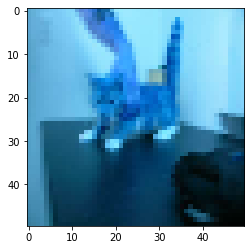

In [23]:
new_img_array_rgb = cv2.resize(img_array_rgb,(IMAGE_SIZE,IMAGE_SIZE) )
plt.imshow(new_img_array_rgb)
plt.show()

In [24]:
# This is the funtion that will create the training data after the images are pre-processed for RGB
rgb_training_data = []

def create_rgb_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category) # This gets us to the path for each class
        
        # create the class
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            
            try:
                img_array_rgb = cv2.imread(os.path.join(path,img))                
                #print(img_array_grayscale)
                
                # Displaying the image                 
                #plt.imshow(img_array_grayscale,cmap='gray')
                #plt.show()
                #break

                # resize the images
                new_img_array_rgb = cv2.resize(img_array_rgb,(IMAGE_SIZE,IMAGE_SIZE) )
                print("Shape after resize is :: {} and Shape before resize was :: {} ".format(new_img_array_rgb.shape,img_array_rgb.shape))
                

                # add to the training data list
                rgb_training_data.append([new_img_array_rgb,class_num])
            except Exception as e:
                pass         
            

In [25]:
# Generate the training datafor rgb
create_rgb_training_data()

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (280, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 489, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 403, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (149, 150, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 431, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (471, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (177, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (320, 460, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (411, 368, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (200, 296, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (220, 222, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (407, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 341, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (281, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (226, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (312, 467, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (108, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (313, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (464, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (471, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (200, 124, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 341, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 448, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 428, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 479, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (279, 328, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (376, 418, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (348, 371, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (243, 214, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (386, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (308, 408, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (262, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (49, 50, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (288, 431, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 180, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (269, 356, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (405, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 253, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (431, 462, 3) 
Shape 

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 445, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 481, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (388, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (344, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (395, 404, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (174, 215, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (149, 191, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (364, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (372, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (424, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (261, 149, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (370, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (381, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (270, 188, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (437, 450, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (343, 336, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (226, 279, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (315, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (466, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (213, 210, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (422, 356, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (286, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 359, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 379, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (321, 305, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (351, 451, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 493, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (450, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 415, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (250, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (313, 426, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (463, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (323, 340, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 366, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (253, 345, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (266, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (483, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (250, 238, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 383, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 397, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 212, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (305, 356, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (225, 273, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (475, 392, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 240, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 219, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 360, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 465, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (250, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (348, 279, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (478, 476, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (301, 373, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (337, 450, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 470, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (320, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 408, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (116, 110, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (483, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (451, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (95, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (289, 387, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (216, 238, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (356, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (156, 149, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 184, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (389, 448, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (232, 418, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (230, 204, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 430, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (244, 279, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (448, 235, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 352, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (238, 149, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (148, 135, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (376, 450, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (262, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (408, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 473, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (403, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 364, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (330, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (143, 255, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (254, 359, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (460, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (357, 390, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 446, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (405, 478, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (268, 359, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 465, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 270, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (234, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (189, 321, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (225, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (157, 180, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (376, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (346, 380, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (225, 175, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 378, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (465, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (331, 228, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (136, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (402, 470, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 265, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (222, 239, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (337, 288, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (360, 479, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (272, 361, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (224, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (462, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 219, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 246, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (408, 307, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 361, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (269, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (304, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 315, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (264, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (255, 339, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (259, 378, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (158, 262, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 423, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (262, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 443, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 448, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 362, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (438, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (424, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 341, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 398, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (334, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (419, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (320, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 423, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (326, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 407, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (448, 311, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (457, 484, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (290, 324, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 190, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (312, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (358, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 413, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (113, 150, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (133, 180, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (232, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 395, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (352, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (429, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (412, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (474, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (342, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 417, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 348, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (448, 321, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (280, 312, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (319, 278, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (314, 329, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 165, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (261, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (270, 266, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (479, 415, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (383, 228, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 460, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (150, 199, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (301, 291, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (469, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (292, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 412, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (457, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 406, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (336, 447, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (270, 206, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 394, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (449, 433, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (161, 252, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (360, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (419, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (331, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (474, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 237, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (305, 409, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 390, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (269, 234, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (435, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (254, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (345, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (307, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (415, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (203, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (343, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (376, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 328, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (319, 448, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (262, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (261, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 368, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (413, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 338, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (286, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (424, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 426, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 424, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (411, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (393, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (307, 206, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (149, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (305, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 478, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (156, 207, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (468, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (431, 312, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (291, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (337, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (459, 363, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (437, 453, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (247, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (473, 498, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 490, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (294, 277, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (453, 437, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (421, 472, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (170, 174, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (116, 180, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 269, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 329, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (225, 373, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (220, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (330, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (298, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 431, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (265, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 427, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (496, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (245, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (301, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (187, 250, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 385, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 469, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (231, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 425, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (265, 448, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (234, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (381, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (224, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (221, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (261, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (357, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (347, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (344, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (137, 180, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 412, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (321, 479, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (267, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (321, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 245, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 216, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 459, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (235, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (324, 431, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (311, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (164, 215, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (235, 344, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (481, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (447, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (383, 384, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (351, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 337, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (110, 154, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (427, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (250, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (343, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (246, 174, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (439, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (388, 420, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 279, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (459, 323, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (412, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (434, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (225, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 395, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 470, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 416, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (241, 325, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (288, 283, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (153, 159, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 433, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 396, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (483, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (209, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (294, 373, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (306, 463, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (216, 299, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (323, 243, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (140, 294, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 479, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (224, 188, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (498, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 368, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (424, 316, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (92, 140, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (337, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (496, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (421, 405, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (244, 425, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (200, 266, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (435, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (361, 495, 3) 
Shape

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 224, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (323, 155, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (337, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (371, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 340, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (453, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (338, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 402, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (390, 464, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (301, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 439, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (158, 168, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (96, 83, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 336, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (388, 500, 3) 
Shape 

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (350, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (486, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 410, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (423, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (437, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (288, 288, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (397, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (353, 431, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (405, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (378, 437, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (330, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (223, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (440, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 317, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (479, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 489, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (313, 469, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (283, 264, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 392, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (383, 478, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (261, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 169, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (377, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 476, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (457, 366, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (394, 494, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 287, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (384, 220, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 272, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (329, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (149, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (186, 312, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (253, 209, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (430, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (370, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 474, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 303, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 430, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (363, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (432, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 363, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 342, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 240, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (382, 302, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 376, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (479, 407, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 343, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (378, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (447, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (270, 209, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 333, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (303, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (398, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (440, 439, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (260, 235, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (479, 360, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (318, 260, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 394, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 247, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (179, 199, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (315, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 391, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 347, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (161, 162, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (416, 312, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (455, 450, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (106, 160, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (493, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (356, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 333, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (402, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 340, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 258, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (317, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (309, 379, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (398, 277, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (310, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 391, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 410, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (357, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (224, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 476, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 491, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 437, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (343, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (377, 449, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (296, 447, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 448, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (331, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (459, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (317, 431, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (462, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (193, 287, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (354, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (269, 360, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (301, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (278, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 463, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (361, 496, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (336, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 462, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (422, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 333, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (382, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (356, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (338, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (410, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (426, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 470, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (291, 335, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (304, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (343, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (169, 166, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (360, 479, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 455, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 240, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 383, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (283, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (334, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 397, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (272, 313, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (120, 195, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (193, 223, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (150, 189, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (175, 233, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (275, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 472, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (207, 289, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (269, 360, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (422, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 277, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (422, 150, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (377, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (354, 471, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 446, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (439, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (395, 449, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (470, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (320, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (200, 229, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 483, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (187, 249, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (461, 466, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (347, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (216, 287, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (236, 168, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 399, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 309, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 367, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (393, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 443, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (354, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (481, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (320, 281, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (213, 239, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (205, 237, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (429, 340, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 462, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (447, 291, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 356, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (288, 259, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (267, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (246, 325, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (328, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (331, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (473, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (479, 360, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (459, 440, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 421, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (125, 166, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (423, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 336, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (250, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (356, 271, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (269, 360, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (212, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 323, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (284, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (371, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (368, 362, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (336, 447, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (278, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (464, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (224, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (376, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (323, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (225, 284, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 75, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (479, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 500, 3) 
Shape

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (293, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (231, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (264, 450, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (246, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (494, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (223, 146, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (466, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (320, 239, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (469, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (304, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (261, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (461, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (452, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 366, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (396, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (236, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (251, 184, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (295, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (453, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (331, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 225, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (376, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (309, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (213, 150, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (245, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (492, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 379, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 449, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (161, 162, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (149, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 346, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (261, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (320, 285, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (149, 150, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (269, 332, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (252, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (320, 269, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (390, 449, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (330, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (197, 332, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 380, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (153, 175, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (208, 180, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 410, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 448, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (394, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (334, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (434, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (296, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (496, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (383, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (215, 184, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 484, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (482, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 333, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (406, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (298, 448, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 346, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (224, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (334, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (194, 260, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (361, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (187, 192, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (218, 240, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (248, 396, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (362, 335, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (224, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 476, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (267, 199, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (189, 221, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (270, 359, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (298, 298, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (476, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 290, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (234, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (396, 296, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 283, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (484, 431, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (262, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (135, 150, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 413, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (398, 427, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 334, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (434, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (479, 442, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (466, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (224, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (140, 168, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (336, 447, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (270, 261, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 382, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 410, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 398, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (127, 179, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (336, 447, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (388, 399, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (363, 429, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 428, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (348, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (267, 288, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (436, 451, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (289, 250, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (423, 371, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (496, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (152, 320, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 377, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (288, 287, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (272, 287, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (383, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (260, 194, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (425, 495, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (269, 355, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 269, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (288, 383, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (319, 487, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (182, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (448, 358, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (250, 238, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 331, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (293, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 349, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (385, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (384, 377, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (423, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (329, 287, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (336, 447, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (241, 449, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (265, 227, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (369, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (90, 191, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 360, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (385, 432, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 294, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (88, 120, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (479, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape 

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 308, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (398, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (414, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (368, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (349, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (86, 124, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (288, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (409, 500, 3) 
Shape

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (458, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (120, 88, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (433, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (395, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (365, 336, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (249, 237, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (467, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (113, 140, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (463, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 423, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (496, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 359, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (174, 117, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (459, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (355, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 417, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (388, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (402, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (350, 262, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (287, 255, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (303, 327, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (471, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (432, 292, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 254, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (361, 359, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 433, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (149, 150, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (421, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (388, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (476, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (345, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (261, 350, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (259, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 461, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (395, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (341, 234, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (329, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (269, 258, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (223, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 250, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (405, 462, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 305, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (135, 181, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (383, 335, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 356, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (376, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (320, 388, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (134, 135, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (287, 277, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (360, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (417, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (200, 165, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (112, 148, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 286, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (302, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (491, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (223, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (320, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (418, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (380, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (270, 359, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (307, 440, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (324, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (398, 431, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (232, 209, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 384, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 255, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (270, 179, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 434, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (336, 447, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 368, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (216, 215, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (331, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 410, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 446, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (334, 339, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (175, 225, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 305, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (441, 408, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (402, 446, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (404, 389, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 443, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 393, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (217, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (420, 391, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (276, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (260, 339, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (369, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (71, 96, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (398, 293, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 329, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (338, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 275, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (255, 248, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (225, 275, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 318, 3) 
Shape 

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (268, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 408, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (166, 238, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (364, 290, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 237, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 424, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (331, 416, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (207, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 191, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (432, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (430, 357, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (220, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 266, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (287, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (349, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (261, 150, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (436, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (116, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (471, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (201, 150, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (361, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (344, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (453, 359, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (451, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (488, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (177, 238, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (296, 223, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (161, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (149, 200, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (321, 321, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 451, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 359, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (334, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (363, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 486, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 359, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (380, 492, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (463, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (285, 232, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (356, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (264, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (370, 441, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (458, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (465, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (371, 310, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 304, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 478, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (283, 239, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (475, 380, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (307, 210, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (236, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (353, 392, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (307, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (231, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (329, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (430, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (406, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 334, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (334, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 265, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 291, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (200, 174, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (446, 368, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (486, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (357, 401, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (350, 247, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (119, 119, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (468, 311, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (393, 484, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (383, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 432, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 310, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (372, 425, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 366, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (287, 315, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (107, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (497, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 464, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 332, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (393, 311, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (312, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 392, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (330, 288, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 383, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (417, 290, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (221, 318, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (430, 482, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (376, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (485, 308, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (487, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 239, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (186, 250, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (139, 149, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (113, 149, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 479, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 461, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (344, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (319, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (321, 479, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (434, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (234, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (395, 388, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (427, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (420, 431, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (465, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (200, 149, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (183, 274, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 434, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 333, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 313, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 418, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (371, 479, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (351, 257, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (269, 360, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (340, 449, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (398, 297, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 372, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (432, 321, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (310, 242, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 469, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 421, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (319, 426, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (408, 287, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 496, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (269, 360, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 397, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (383, 306, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (371, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 382, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (370, 394, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (310, 362, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (479, 336, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (101, 149, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (364, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (287, 253, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 269, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (295, 240, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (249, 293, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (331, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (224, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (330, 396, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 325, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (312, 415, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (191, 119, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (354, 347, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 340, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 334, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 357, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (377, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (358, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 398, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (488, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 199, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 289, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (414, 458, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (416, 458, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (244, 250, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (310, 368, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (226, 336, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 325, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (331, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (253, 199, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (222, 213, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 308, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (348, 450, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (403, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (382, 411, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 362, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (274, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (302, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (324, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (322, 276, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (455, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (273, 236, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 332, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (277, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (259, 340, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (288, 351, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (393, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (100, 113, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (417, 314, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (207, 297, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (312, 259, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (231, 310, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 453, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (389, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (329, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 371, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 347, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (294, 233, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (197, 149, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (198, 118, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (144, 126, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (294, 302, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 415, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (190, 238, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 414, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 449, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (232, 231, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (114, 115, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (122, 160, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (330, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 479, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 366, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (211, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (295, 429, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (242, 162, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 360, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 465, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (174, 186, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (434, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 462, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (380, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 274, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (357, 273, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (376, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (474, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (473, 357, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 333, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (198, 162, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (200, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 239, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (448, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 488, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 384, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (393, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (304, 314, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 318, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 277, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 415, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 155, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (460, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (354, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (340, 402, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (288, 431, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (379, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (55, 59, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (473, 357, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape 

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (407, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (396, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 424, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (278, 420, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (365, 262, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (327, 314, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (424, 312, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (398, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (350, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (411, 363, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (350, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (444, 380, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 401, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (448, 335, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 403, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (377, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (416, 411, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (198, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (161, 225, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (247, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (327, 316, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 490, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (448, 334, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (149, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (339, 340, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (407, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (319, 322, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (293, 218, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (423, 385, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 297, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 356, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (256, 340, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 332, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (207, 259, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 410, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (149, 118, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (298, 266, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 477, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (401, 466, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (384, 308, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (397, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (360, 238, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (188, 252, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (242, 281, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (454, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (379, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (202, 303, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (336, 437, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (356, 478, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (360, 479, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 489, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 497, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (64, 96, 3) 
Shape 

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (351, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 348, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 448, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (89, 120, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (364, 335, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (337, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (401, 349, 3) 
Shape

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (448, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (252, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (349, 335, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (464, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (108, 107, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (167, 196, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (356, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (461, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (179, 240, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (436, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (432, 258, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (219, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (307, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (387, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (463, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (101, 100, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 326, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (343, 349, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 363, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (281, 357, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 369, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (322, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (350, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (421, 356, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 463, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 484, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (276, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (371, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (452, 397, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (382, 286, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (259, 340, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (318, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (166, 220, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 342, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (319, 307, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 420, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (330, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (436, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (276, 250, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (445, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (427, 426, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (394, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (358, 419, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (307, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (479, 353, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 445, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (432, 479, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (422, 449, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (145, 195, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (370, 300, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (273, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 477, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 498, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (461, 398, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (285, 376, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (360, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (447, 317, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (270, 282, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (236, 249, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (241, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 334, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (259, 340, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (125, 124, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 286, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 359, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (496, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (331, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (312, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (322, 232, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (360, 479, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (350, 252, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (372, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (161, 194, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (144, 131, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 334, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (89, 120, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (443, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (196, 254, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (422, 423, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (356, 251, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 242, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (436, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 252, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 273, 3) 
Shape

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (254, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (336, 447, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 417, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (256, 344, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (263, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (318, 371, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 321, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 407, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (319, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 335, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (329, 424, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (390, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (225, 241, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 407, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (298, 447, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (352, 336, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (302, 433, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (366, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 192, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (132, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (357, 442, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 401, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 337, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (424, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (361, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (460, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 346, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (441, 384, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 376, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (212, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (227, 229, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (448, 379, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (360, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (268, 293, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (228, 136, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 267, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (247, 328, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (317, 449, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (80, 119, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (266, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (149, 150, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 448, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (317, 371, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (270, 204, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (436, 499, 3) 
Shape

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (432, 332, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (191, 256, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 467, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (261, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (446, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (250, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (337, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (337, 325, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (419, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (352, 380, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (263, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (437, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (150, 199, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (269, 180, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (173, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (353, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (331, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 403, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (232, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (262, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 288, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (398, 283, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (177, 199, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (305, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (363, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (189, 199, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (408, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (286, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (215, 288, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 328, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (358, 288, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (396, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 136, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (295, 248, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (225, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (479, 360, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 284, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 306, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 417, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 381, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 360, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 418, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (364, 345, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (89, 60, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (401, 359, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (390, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 402, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (200, 184, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (143, 108, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (393, 450, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (337, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (336, 339, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (227, 360, 3) 
Shape 

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 370, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 438, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 181, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (229, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 301, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (311, 432, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (318, 479, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (215, 222, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (107, 199, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 407, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (230, 186, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (112, 150, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 426, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (360, 479, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 363, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (378, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (308, 384, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (339, 216, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (320, 307, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 266, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (331, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 362, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (378, 460, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (447, 336, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 381, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (283, 424, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 445, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (469, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (320, 239, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (167, 180, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 386, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (449, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (325, 431, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (172, 222, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (413, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (355, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (412, 223, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (286, 178, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 296, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (145, 188, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 361, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (382, 400, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (416, 356, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (228, 290, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (446, 269, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (271, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 402, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (272, 199, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 394, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (166, 220, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (180, 154, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (226, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (381, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (442, 330, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 309, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (320, 183, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 427, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (276, 368, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (179, 240, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (379, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (200, 199, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 448, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (416, 341, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 330, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (467, 326, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (268, 265, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (337, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 359, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (364, 343, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (309, 407, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 325, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 443, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (418, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 405, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (149, 101, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (470, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (249, 170, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 199, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (358, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 366, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (286, 301, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (183, 171, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (338, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (320, 239, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (331, 406, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 267, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (478, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (350, 403, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (225, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 448, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (462, 307, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 343, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (418, 250, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (327, 315, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 455, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (378, 449, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (259, 241, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (213, 140, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (311, 323, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (272, 252, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (287, 300, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (402, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 462, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (278, 379, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (200, 182, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 362, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (225, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (385, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 364, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 483, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 353, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 477, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 476, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (167, 180, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 332, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 240, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (461, 343, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (348, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (382, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (198, 175, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (200, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (413, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (428, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (357, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (178, 199, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (149, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (266, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 397, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 335, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (330, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 292, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (371, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 463, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 455, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 340, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (345, 335, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 296, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (402, 461, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (259, 380, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (142, 167, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (304, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (194, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (475, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (261, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 488, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (288, 384, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (262, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (467, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (314, 379, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (397, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (169, 134, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (255, 384, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (253, 193, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 125, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (373, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (154, 199, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (114, 149, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 124, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (323, 322, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (389, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (401, 355, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (361, 449, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (239, 320, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (270, 359, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (110, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (434, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (332, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 449, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (323, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 385, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (249, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (288, 429, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (345, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (364, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (292, 299, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (240, 319, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (223, 174, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 380, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (487, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (331, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (308, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (348, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (258, 199, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 407, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 450, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (318, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (86, 167, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (245, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 433, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (427, 413, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (201, 287, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (206, 287, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (357, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 395, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (250, 249, 3) 
Shape

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 364, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (250, 219, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (440, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 466, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (225, 197, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (344, 475, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (463, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (387, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (285, 379, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (345, 476, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (368, 280, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 435, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (274, 336, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (404, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (407, 225, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (458, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (199, 164, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (495, 488, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (293, 350, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (212, 158, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (393, 339, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (479, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (287, 174, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (370, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (271, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (429, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 426, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (429, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (359, 223, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (392, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (496, 394, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 430, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (394, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (333, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (316, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 471, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 207, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (465, 403, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (311, 327, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (183, 199, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 251, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (287, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 351, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 360, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (399, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 428, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (391, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (376, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 334, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 399, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (400, 436, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 432, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 366, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (299, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (262, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (174, 152, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 433, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 490, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (479, 295, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 273, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (433, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (80, 59, 3) 
Shape 

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 333, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (357, 375, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (281, 380, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (209, 163, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (450, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (335, 336, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (294, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (179, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (438, 400, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (266, 216, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (286, 349, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (372, 374, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 410, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (392, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 461, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (419, 334, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (417, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (72, 95, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 408, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (212, 273, 3) 
Shape 

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (479, 479, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (446, 476, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (183, 273, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (246, 231, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (341, 415, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (474, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (378, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (376, 223, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (356, 315, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (469, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 354, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 175, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (336, 425, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (309, 333, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (348, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (225, 254, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 325, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (309, 334, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (181, 200, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 491, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (480, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (221, 214, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (300, 341, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (395, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (429, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 318, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (414, 500, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (497, 313, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (248, 247, 3) 
Shap

Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (252, 148, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (401, 480, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (388, 415, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (500, 431, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (278, 249, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (499, 385, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (378, 421, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (142, 119, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (435, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (375, 499, 3) 
Shape after resize is :: (50, 50, 3) and Shape before resize was :: (374, 500, 3) 
Shap

In [26]:
# shuffle the data just to ensure that the mix is natural
random.shuffle(rgb_training_data)

In [27]:
# check to ensure the labels are corred
for sample in training_data[:3]:
    print(sample[0]) # This is the image array (Matrix of numbers representing that specific image). If you want to see the label, then you change the index to 1

[[ 67  64  63 ...  91 103  98]
 [ 71  70  67 ... 101 109 112]
 [ 75  75  68 ...  98 109 113]
 ...
 [116 242 255 ... 255 255 254]
 [244 253 255 ... 255 255 253]
 [254 254 255 ... 255 255 253]]
[[ 94  79  66 ...  71  62  66]
 [122  76  57 ...  48  41  74]
 [ 64  71  74 ...  65  97 105]
 ...
 [ 84 115  97 ... 102  65  81]
 [ 76  72  76 ... 122  75  91]
 [ 86  77 102 ...  96 162 133]]
[[133 131 131 ... 207 206 206]
 [134 132 135 ... 216 217 213]
 [135 131 133 ... 232 232 231]
 ...
 [132 111  94 ... 211 165 106]
 [117 130 135 ... 149 147  43]
 [228 232 236 ... 204 185 107]]


In [28]:
# Pack these values into the variables
X_rgb = []
y_rgb = []

for features, label in rgb_training_data:
    X_rgb.append(features)
    y_rgb.append(label)

In [29]:
# Xrgb is a list containing all the images in RGB format. We check the length of the images
len(X_rgb)

25000

In [30]:
# y_rgb is list containing the labels for each of the images in RGB format. We check the length of the labels
len(y_rgb)

25000

In [31]:
# convert both lists into numpy array and reshape it to a vector of features
X_rgb_ = np.array(X_rgb).reshape(-1,IMAGE_SIZE,IMAGE_SIZE, 3) # We are working with rgb
y_rgb_ = np.array(y_rgb)

In [32]:
# Check the shape of the numpy array
X_rgb_.shape

(25000, 50, 50, 3)

In [33]:
# save the rgb features 
pickle_out_rgb = open("./pickles/X_rgb.pickle","wb")
pickle.dump(X_rgb_,pickle_out_rgb)
pickle_out_rgb.close()

In [34]:
# save the grayscale labels 
pickle_out_rgb = open("./pickles/y_rgb.pickle","wb")
pickle.dump(y_rgb_,pickle_out_rgb)
pickle_out_rgb.close()

## Feeding the data into a convolution neural network - Grayscale

In [35]:
# Open the saved grayscale features
pickle_in = open("./pickles/X_grayscale.pickle","rb")
X = pickle.load(pickle_in)

In [36]:
X

array([[[[ 67],
         [ 64],
         [ 63],
         ...,
         [ 91],
         [103],
         [ 98]],

        [[ 71],
         [ 70],
         [ 67],
         ...,
         [101],
         [109],
         [112]],

        [[ 75],
         [ 75],
         [ 68],
         ...,
         [ 98],
         [109],
         [113]],

        ...,

        [[116],
         [242],
         [255],
         ...,
         [255],
         [255],
         [254]],

        [[244],
         [253],
         [255],
         ...,
         [255],
         [255],
         [253]],

        [[254],
         [254],
         [255],
         ...,
         [255],
         [255],
         [253]]],


       [[[ 94],
         [ 79],
         [ 66],
         ...,
         [ 71],
         [ 62],
         [ 66]],

        [[122],
         [ 76],
         [ 57],
         ...,
         [ 48],
         [ 41],
         [ 74]],

        [[ 64],
         [ 71],
         [ 74],
         ...,
         [ 65],
         [

In [37]:
# Open the saved grayscale labels
pickle_in = open("./pickles/y_grayscale.pickle","rb")
y = pickle.load(pickle_in)

In [38]:
# Normalize
X = X/255.0

In [39]:
X.shape[1:]

(50, 50, 1)

In [40]:
# Building the model
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X,y,batch_size=32, epochs=10, validation_split=0.1,callbacks=[tensorboard_grayscale])

Epoch 1/10
  1/704 [..............................] - ETA: 0s - loss: 0.6890 - accuracy: 0.5625WARNING:tensorflow:From C:\Users\rodhiambo2\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
704/704 [==============================] - 42s 59ms/step - loss: 0.6108 - accuracy: 0.6590 - val_loss: 0.5563 - val_accuracy: 0.7128
Epoch 2/10
704/704 [==============================] - 42s 60ms/step - loss: 0.5120 - accuracy: 0.7488 - val_loss: 0.4888 - val_accuracy: 0.7728
Epoch 3/10
704/704 [==============================] - 41s 58ms/step - loss: 0.4683 - accuracy: 0.7750 - val_loss: 0.4797 - val_accuracy: 0.7772
Epoch 4/10
704/704 [==============================] - 41s 58ms/step - loss: 0.4363 - accuracy: 0.7979 - val_loss: 0.4979 - val_accuracy: 0.7612
Epoch 5/10
704/704 [===============

## Feeding the data into a convolution neural network - RGB

In [41]:
# Open the saved grayscale features
pickle_in_rgb = open("./pickles/X_rgb.pickle","rb")
X_rgb = pickle.load(pickle_in_rgb)

In [42]:
X_rgb

array([[[[ 26,  51,  51],
         [ 11,   8,   2],
         [ 11,  12,   8],
         ...,
         [161, 198, 190],
         [ 91, 127, 120],
         [ 58,  89,  84]],

        [[  6,  25,  26],
         [  5,  12,   3],
         [ 11,  11,   8],
         ...,
         [ 63,  90,  95],
         [ 63,  89,  95],
         [ 60,  94,  94]],

        [[ 17,  27,  30],
         [  9,   8,   1],
         [ 11,  12,   8],
         ...,
         [ 67, 103, 103],
         [ 69, 105, 105],
         [ 67, 101, 101]],

        ...,

        [[171, 192, 197],
         [187, 208, 213],
         [158, 172, 179],
         ...,
         [152, 172, 173],
         [157, 179, 180],
         [137, 167, 163]],

        [[207, 226, 223],
         [185, 204, 201],
         [144, 165, 170],
         ...,
         [144, 167, 174],
         [132, 155, 161],
         [136, 167, 169]],

        [[187, 205, 208],
         [198, 215, 218],
         [159, 187, 221],
         ...,
         [161, 185, 181],
        

In [43]:
# Open the saved grayscale labels
pickle_in_rgb = open("./pickles/y_rgb.pickle","rb")
y_rgb = pickle.load(pickle_in_rgb)

In [44]:
# Normalize
X_rgb = X_rgb/255.0

In [45]:
X_rgb.shape[1:]

(50, 50, 3)

In [46]:
# Building the model
rgb_model = Sequential()

# Input layer
rgb_model.add(Conv2D(64, (3,3), input_shape = X_rgb.shape[1:]))
rgb_model.add(Activation("relu"))
rgb_model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution layer
rgb_model.add(Conv2D(64, (3,3)))
rgb_model.add(Activation("relu"))
rgb_model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening
rgb_model.add(Flatten())

# Hidden Layers
rgb_model.add(Dense(64))
rgb_model.add(Activation('relu'))

# Output layer
rgb_model.add(Dense(1))
rgb_model.add(Activation('sigmoid'))

# model compiling
rgb_model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

rgb_model.fit(X_rgb,y_rgb,batch_size=32, epochs=10, validation_split=0.1,callbacks=[tensorboard_rgb])

Epoch 1/10
704/704 [==============================] - 44s 63ms/step - loss: 0.5852 - accuracy: 0.6826 - val_loss: 0.5385 - val_accuracy: 0.7192
Epoch 2/10
704/704 [==============================] - 52s 74ms/step - loss: 0.4830 - accuracy: 0.7680 - val_loss: 0.4965 - val_accuracy: 0.7604
Epoch 3/10
704/704 [==============================] - 52s 73ms/step - loss: 0.4315 - accuracy: 0.7998 - val_loss: 0.4402 - val_accuracy: 0.7904
Epoch 4/10
704/704 [==============================] - 52s 74ms/step - loss: 0.3882 - accuracy: 0.8245 - val_loss: 0.4364 - val_accuracy: 0.7964
Epoch 5/10
704/704 [==============================] - 52s 74ms/step - loss: 0.3523 - accuracy: 0.8422 - val_loss: 0.4193 - val_accuracy: 0.8076
Epoch 6/10
704/704 [==============================] - 53s 75ms/step - loss: 0.3034 - accuracy: 0.8693 - val_loss: 0.4159 - val_accuracy: 0.8152
Epoch 7/10
704/704 [==============================] - 52s 73ms/step - loss: 0.2610 - accuracy: 0.8886 - val_loss: 0.4510 - val_accuracy:

**Increasing performance by adding an additional convolution layer**

In [47]:
# Building the model
rgb_model = Sequential()

# Input layer
rgb_model.add(Conv2D(64, (3,3), input_shape = X_rgb.shape[1:]))
rgb_model.add(Activation("relu"))
rgb_model.add(MaxPooling2D(pool_size=(2,2)))

# First Convolution layer
rgb_model.add(Conv2D(64, (3,3)))
rgb_model.add(Activation("relu"))
rgb_model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolution layer
rgb_model.add(Conv2D(64, (3,3)))
rgb_model.add(Activation("relu"))
rgb_model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening
rgb_model.add(Flatten())

# Hidden Layers
rgb_model.add(Dense(64))
rgb_model.add(Activation('relu'))

# Output layer
rgb_model.add(Dense(1))
rgb_model.add(Activation('sigmoid'))

# model compiling
rgb_model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

rgb_model.fit(X_rgb,y_rgb,batch_size=32, epochs=10, validation_split=0.1,callbacks=[tensorboard_rgb_improved])

Epoch 1/10
704/704 [==============================] - 57s 81ms/step - loss: 0.6455 - accuracy: 0.6083 - val_loss: 0.6071 - val_accuracy: 0.6664
Epoch 2/10
704/704 [==============================] - 55s 77ms/step - loss: 0.5083 - accuracy: 0.7496 - val_loss: 0.5136 - val_accuracy: 0.7516
Epoch 3/10
704/704 [==============================] - 56s 80ms/step - loss: 0.4357 - accuracy: 0.7966 - val_loss: 0.4227 - val_accuracy: 0.8100
Epoch 4/10
704/704 [==============================] - 62s 88ms/step - loss: 0.3912 - accuracy: 0.8222 - val_loss: 0.4811 - val_accuracy: 0.7744
Epoch 5/10
704/704 [==============================] - 59s 84ms/step - loss: 0.3472 - accuracy: 0.8453 - val_loss: 0.4100 - val_accuracy: 0.8024
Epoch 6/10
704/704 [==============================] - 56s 79ms/step - loss: 0.3126 - accuracy: 0.8626 - val_loss: 0.3770 - val_accuracy: 0.8328
Epoch 7/10
704/704 [==============================] - 58s 82ms/step - loss: 0.2757 - accuracy: 0.8826 - val_loss: 0.4247 - val_accuracy:

### Optimizing the model automatically

In [48]:
dense_layers = [0,1,2]
layer_sizes = [32,64,128]
conv_layers = [1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size,dense_layer, int(time.time()))
            tensorboard_rgb_improved_auto = TensorBoard(log_dir="./logs/improved_auto{}".format(NAME))
            # Building the model
            rgb_model_auto = Sequential()

            # Input layer
            rgb_model_auto.add(Conv2D(layer_size, (3,3), input_shape = X_rgb.shape[1:]))
            rgb_model_auto.add(Activation("relu"))
            rgb_model_auto.add(MaxPooling2D(pool_size=(2,2)))
            
            # Convolution layer
            for l in range(conv_layer-1):                
                rgb_model_auto.add(Conv2D(layer_size, (3,3)))
                rgb_model_auto.add(Activation("relu"))
                rgb_model_auto.add(MaxPooling2D(pool_size=(2,2)))
                
            # Flattening
            rgb_model_auto.add(Flatten())
            
            # Hidden Layers
            for l in range(dense_layer):
                rgb_model_auto.add(Dense(layer_size))
                rgb_model_auto.add(Activation("relu"))
                rgb_model_auto.add(Dropout(0.2))
            
            # Output layer
            rgb_model_auto.add(Dense(1))
            rgb_model_auto.add(Activation('sigmoid'))

            # model compiling
            rgb_model_auto.compile(loss="binary_crossentropy",
                         optimizer="adam",
                         metrics=['accuracy'])

            rgb_model_auto.fit(X_rgb,y_rgb,batch_size=32, epochs=10, validation_split=0.1,callbacks=[tensorboard_rgb_improved_auto])


Epoch 1/10
704/704 [==============================] - 13s 19ms/step - loss: 0.6044 - accuracy: 0.6666 - val_loss: 0.5570 - val_accuracy: 0.7148
Epoch 2/10
704/704 [==============================] - 16s 23ms/step - loss: 0.5198 - accuracy: 0.7468 - val_loss: 0.5449 - val_accuracy: 0.7256
Epoch 3/10
704/704 [==============================] - 15s 22ms/step - loss: 0.4869 - accuracy: 0.7663 - val_loss: 0.5270 - val_accuracy: 0.7372
Epoch 4/10
704/704 [==============================] - 15s 22ms/step - loss: 0.4623 - accuracy: 0.7838 - val_loss: 0.5112 - val_accuracy: 0.7500
Epoch 5/10
704/704 [==============================] - 16s 23ms/step - loss: 0.4420 - accuracy: 0.7944 - val_loss: 0.5047 - val_accuracy: 0.7528
Epoch 6/10
704/704 [==============================] - 15s 21ms/step - loss: 0.4242 - accuracy: 0.8070 - val_loss: 0.5289 - val_accuracy: 0.7428
Epoch 7/10
704/704 [==============================] - 15s 22ms/step - loss: 0.4111 - accuracy: 0.8150 - val_loss: 0.5308 - val_accuracy:

704/704 [==============================] - 57s 81ms/step - loss: 0.3142 - accuracy: 0.8654 - val_loss: 0.4066 - val_accuracy: 0.8148
Epoch 9/10
704/704 [==============================] - 74s 105ms/step - loss: 0.2941 - accuracy: 0.8742 - val_loss: 0.4067 - val_accuracy: 0.8180
Epoch 10/10
704/704 [==============================] - 74s 105ms/step - loss: 0.2744 - accuracy: 0.8820 - val_loss: 0.4287 - val_accuracy: 0.8092
Epoch 1/10
704/704 [==============================] - 82s 117ms/step - loss: 0.6031 - accuracy: 0.6606 - val_loss: 0.5350 - val_accuracy: 0.7336
Epoch 2/10
704/704 [==============================] - 80s 113ms/step - loss: 0.4862 - accuracy: 0.7663 - val_loss: 0.4989 - val_accuracy: 0.7580
Epoch 3/10
704/704 [==============================] - 80s 113ms/step - loss: 0.4381 - accuracy: 0.7960 - val_loss: 0.4592 - val_accuracy: 0.7744
Epoch 4/10
704/704 [==============================] - 81s 115ms/step - loss: 0.4017 - accuracy: 0.8180 - val_loss: 0.4229 - val_accuracy: 0.8

704/704 [==============================] - 14s 20ms/step - loss: 0.3984 - accuracy: 0.8021 - val_loss: 0.5879 - val_accuracy: 0.7328
Epoch 8/10
704/704 [==============================] - 14s 20ms/step - loss: 0.3792 - accuracy: 0.8084 - val_loss: 0.5282 - val_accuracy: 0.7464
Epoch 9/10
704/704 [==============================] - 14s 20ms/step - loss: 0.3604 - accuracy: 0.8233 - val_loss: 0.5395 - val_accuracy: 0.7432
Epoch 10/10
704/704 [==============================] - 14s 20ms/step - loss: 0.3381 - accuracy: 0.8288 - val_loss: 0.6033 - val_accuracy: 0.7520
Epoch 1/10
704/704 [==============================] - 23s 33ms/step - loss: 0.6060 - accuracy: 0.6624 - val_loss: 0.5476 - val_accuracy: 0.7164
Epoch 2/10
704/704 [==============================] - 23s 33ms/step - loss: 0.5132 - accuracy: 0.7475 - val_loss: 0.5630 - val_accuracy: 0.6932
Epoch 3/10
704/704 [==============================] - 23s 33ms/step - loss: 0.4697 - accuracy: 0.7785 - val_loss: 0.4533 - val_accuracy: 0.7844
Ep

Epoch 5/10
704/704 [==============================] - 50s 71ms/step - loss: 0.3449 - accuracy: 0.8475 - val_loss: 0.4426 - val_accuracy: 0.7968
Epoch 6/10
704/704 [==============================] - 50s 71ms/step - loss: 0.3059 - accuracy: 0.8692 - val_loss: 0.4075 - val_accuracy: 0.8220
Epoch 7/10
704/704 [==============================] - 50s 71ms/step - loss: 0.2733 - accuracy: 0.8839 - val_loss: 0.4223 - val_accuracy: 0.8264
Epoch 8/10
704/704 [==============================] - 50s 70ms/step - loss: 0.2425 - accuracy: 0.8990 - val_loss: 0.4467 - val_accuracy: 0.8156
Epoch 9/10
704/704 [==============================] - 51s 72ms/step - loss: 0.2125 - accuracy: 0.9107 - val_loss: 0.4419 - val_accuracy: 0.8300
Epoch 10/10
704/704 [==============================] - 50s 72ms/step - loss: 0.1863 - accuracy: 0.9258 - val_loss: 0.4728 - val_accuracy: 0.8264
Epoch 1/10
704/704 [==============================] - 67s 96ms/step - loss: 0.6146 - accuracy: 0.6734 - val_loss: 0.5546 - val_accuracy

704/704 [==============================] - 25s 35ms/step - loss: 0.2995 - accuracy: 0.8713 - val_loss: 0.4557 - val_accuracy: 0.8012
Epoch 9/10
704/704 [==============================] - 25s 35ms/step - loss: 0.2696 - accuracy: 0.8851 - val_loss: 0.4611 - val_accuracy: 0.7996
Epoch 10/10
704/704 [==============================] - 25s 35ms/step - loss: 0.2439 - accuracy: 0.8948 - val_loss: 0.5233 - val_accuracy: 0.7976
Epoch 1/10
704/704 [==============================] - 27s 38ms/step - loss: 0.6490 - accuracy: 0.6053 - val_loss: 0.5619 - val_accuracy: 0.7112
Epoch 2/10
704/704 [==============================] - 27s 38ms/step - loss: 0.5386 - accuracy: 0.7342 - val_loss: 0.5264 - val_accuracy: 0.7356
Epoch 3/10
704/704 [==============================] - 27s 38ms/step - loss: 0.4803 - accuracy: 0.7714 - val_loss: 0.4746 - val_accuracy: 0.7684
Epoch 4/10
704/704 [==============================] - 27s 38ms/step - loss: 0.4352 - accuracy: 0.8027 - val_loss: 0.4399 - val_accuracy: 0.7912
Ep

704/704 [==============================] - 69s 98ms/step - loss: 0.1111 - accuracy: 0.9584 - val_loss: 1.0598 - val_accuracy: 0.7308
Epoch 10/10
704/704 [==============================] - 68s 97ms/step - loss: 0.0895 - accuracy: 0.9681 - val_loss: 1.0825 - val_accuracy: 0.7304
Epoch 1/10
704/704 [==============================] - 99s 140ms/step - loss: 0.6102 - accuracy: 0.6564 - val_loss: 0.5709 - val_accuracy: 0.7032
Epoch 2/10
704/704 [==============================] - 96s 136ms/step - loss: 0.5122 - accuracy: 0.7470 - val_loss: 0.4953 - val_accuracy: 0.7488
Epoch 3/10
704/704 [==============================] - 95s 135ms/step - loss: 0.4580 - accuracy: 0.7848 - val_loss: 0.4524 - val_accuracy: 0.7880
Epoch 4/10
704/704 [==============================] - 96s 136ms/step - loss: 0.4168 - accuracy: 0.8095 - val_loss: 0.4547 - val_accuracy: 0.7708
Epoch 5/10
704/704 [==============================] - 95s 135ms/step - loss: 0.3765 - accuracy: 0.8299 - val_loss: 0.4347 - val_accuracy: 0.79

### Important Questions

1. How do you determine overfitting for image classification problems using deep learning
2. How do you address overfitting for image classification problems
3. In order to improve performance you can do one of two things:
    a. Add convolution layers
    b. Add Dense layers
   How do you know, how many you should add and will there be a point where you start getting poor results?
4. How do you handle imbalance datasets for image classifications in deep learning
5. How do you save and start using your model